In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
df1 = pd.read_csv('Rose.csv')
df2 = pd.read_csv('Sparkling.csv')

In [3]:
df1.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
df1.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
df2.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [6]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df1['Time_Stamp'] = pd.DataFrame(date)
df1.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [8]:
df1.set_index('Time_Stamp',inplace=True)
df1.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [9]:
df2['Time_Stamp'] = pd.DataFrame(date)
df2.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [10]:
df2.set_index('Time_Stamp',inplace=True)
df2.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [11]:
df1.isna().sum()

YearMonth    0
Rose         2
dtype: int64

In [12]:
df1['Rose'].fillna(df1['Rose'].mode()[0], inplace=True)

In [13]:
df1.isna().sum()

YearMonth    0
Rose         0
dtype: int64

# Plot the graph to understand the behaviour of the dataset

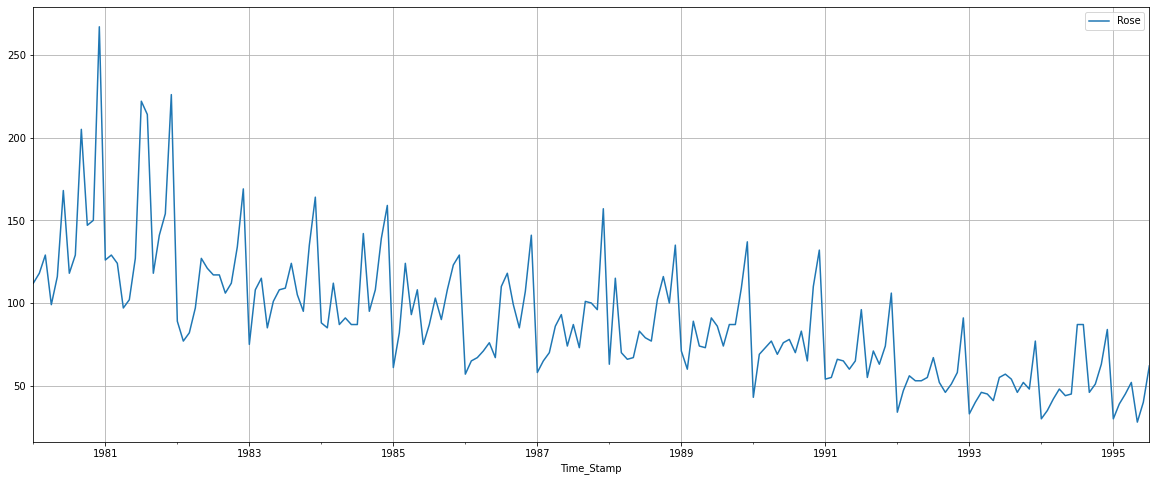

In [14]:
rcParams['figure.figsize']=20,8
df1.plot()
plt.grid();

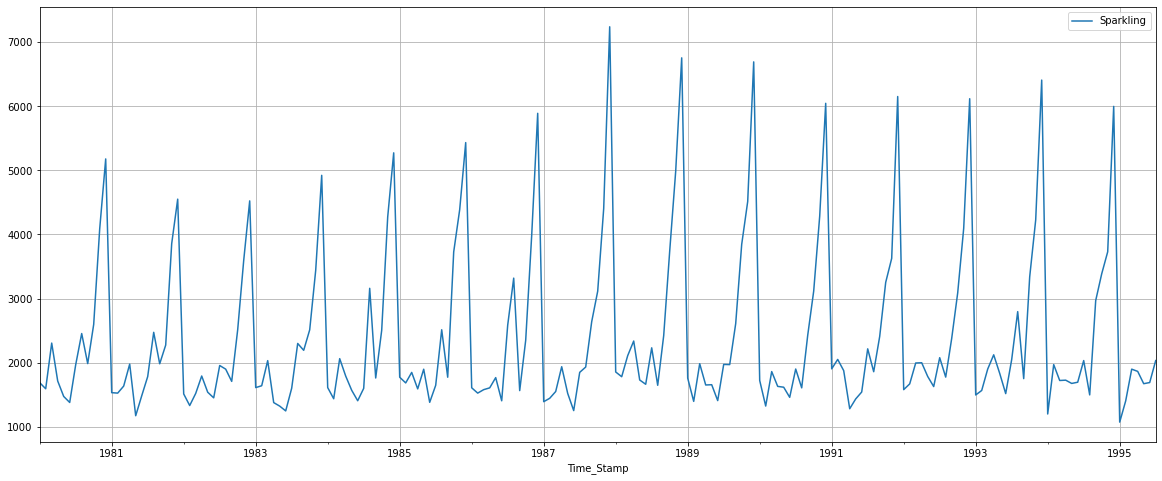

In [15]:
rcParams['figure.figsize']=20,8
df2.plot()
plt.grid();

In [16]:
df1.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  187.0  90.358289  38.965728  28.0  63.0  86.0  111.0  267.0

In [17]:
df2.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [18]:
df1.shape

(187, 2)

In [19]:
df2.shape

(187, 2)

# Yearly plot

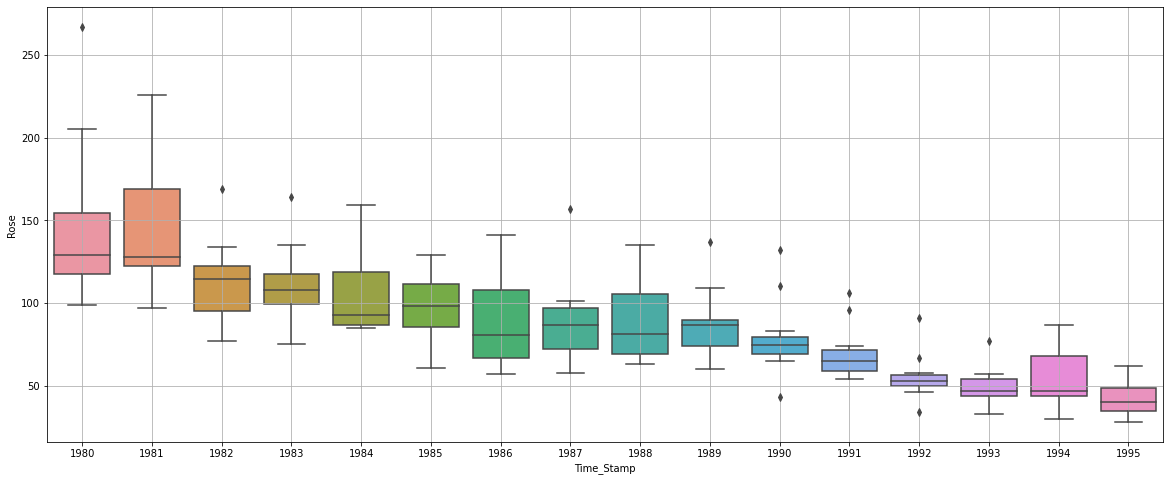

In [20]:
sns.boxplot(x = df1.index.year,y = df1['Rose'])
plt.grid();

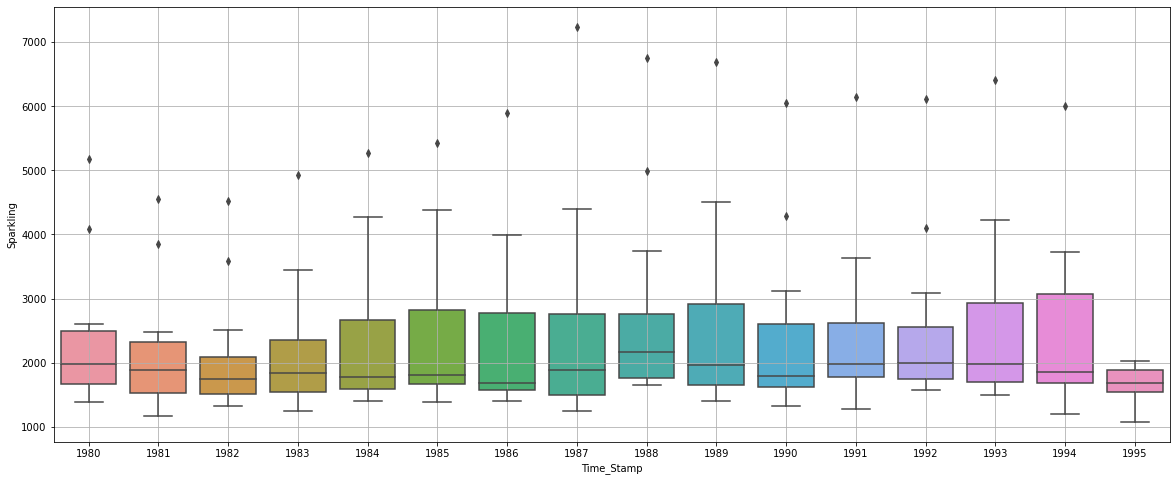

In [21]:
sns.boxplot(x = df2.index.year,y = df2['Sparkling'])
plt.grid();

# Monthly plot

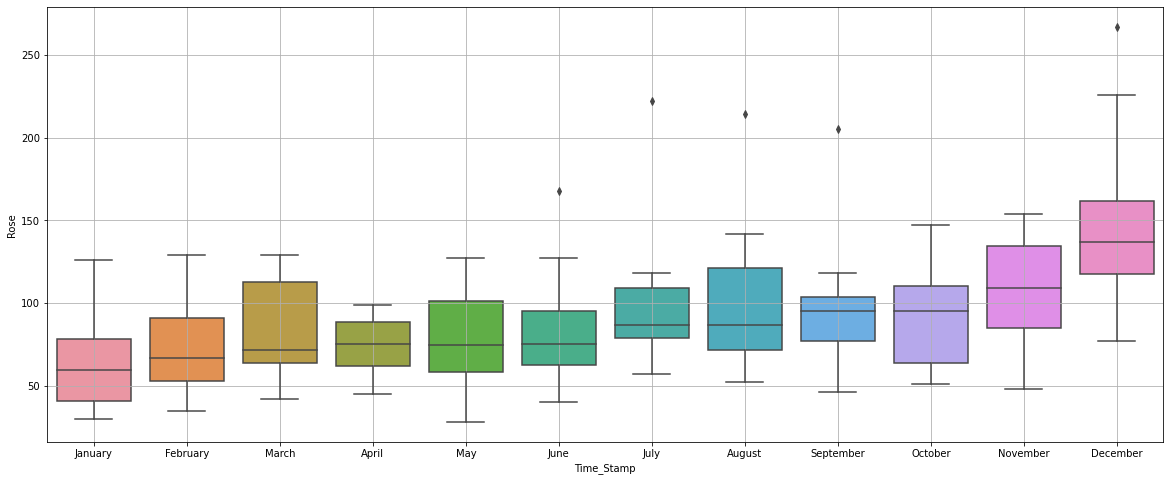

In [22]:
sns.boxplot(x = df1.index.month_name(),y = df1['Rose'])
plt.grid();

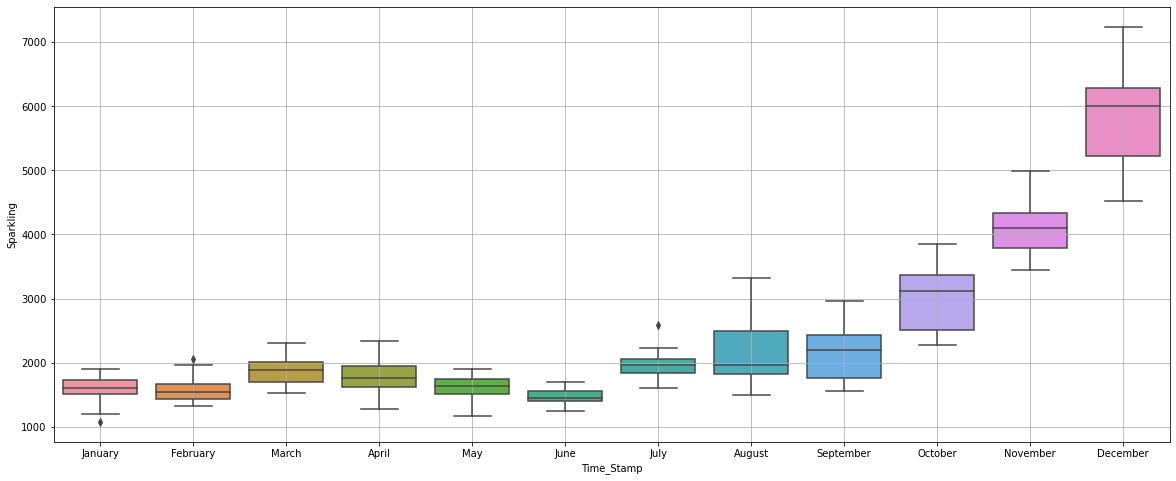

In [23]:
sns.boxplot(x = df2.index.month_name(),y = df2['Sparkling'])
plt.grid();

## Monthly sales across years

In [24]:
monthly_sales_across_years1 = pd.pivot_table(df1, values = 'Rose', columns = df1.index.month, index = df1.index.year)

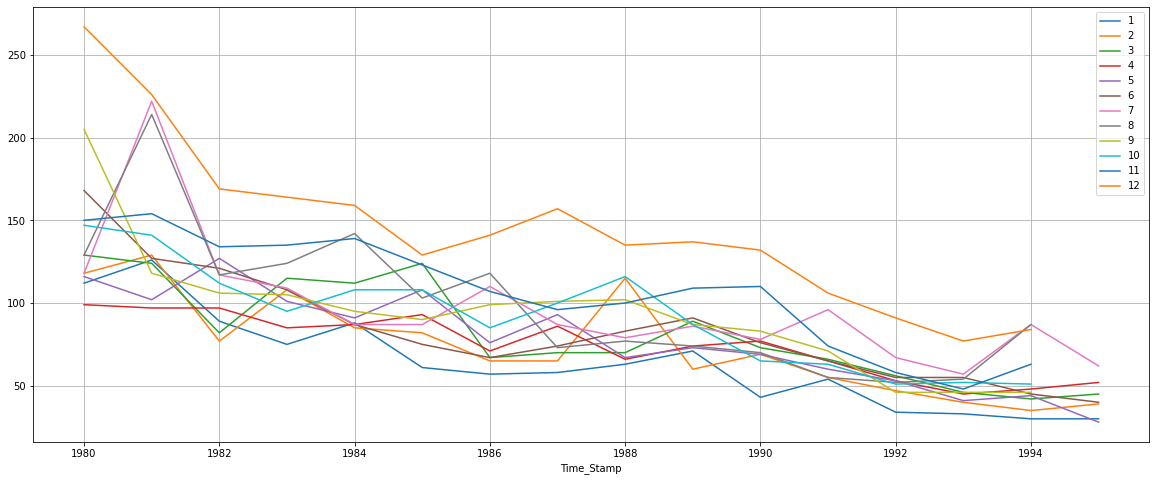

In [25]:
monthly_sales_across_years1.plot()
plt.grid()
plt.legend(loc='best');

In [26]:
monthly_sales_across_years2 = pd.pivot_table(df2, values = 'Sparkling', columns = df2.index.month, index = df2.index.year)

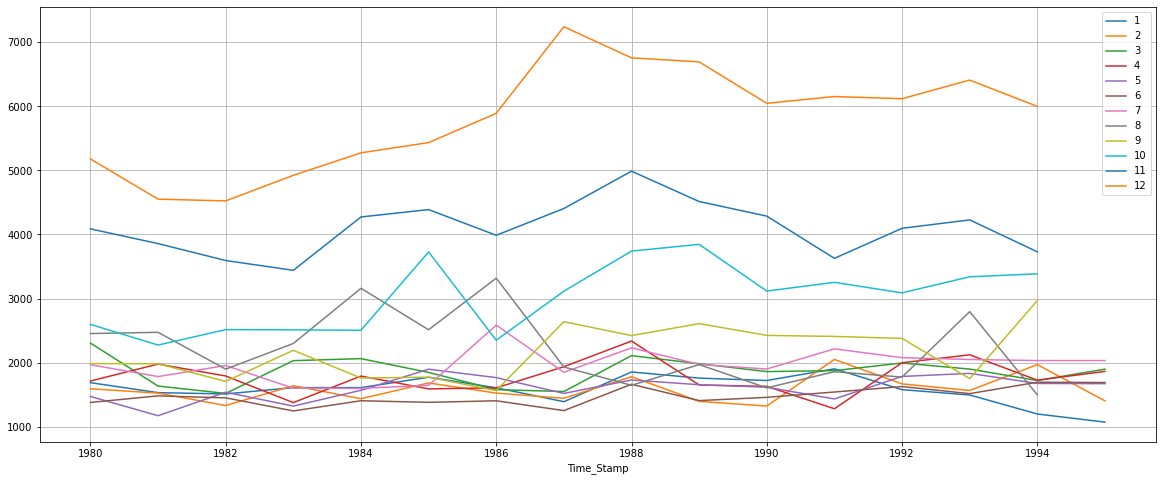

In [27]:
monthly_sales_across_years2.plot()
plt.grid()
plt.legend(loc='best');

# Month Plot and decomposition

# Rose

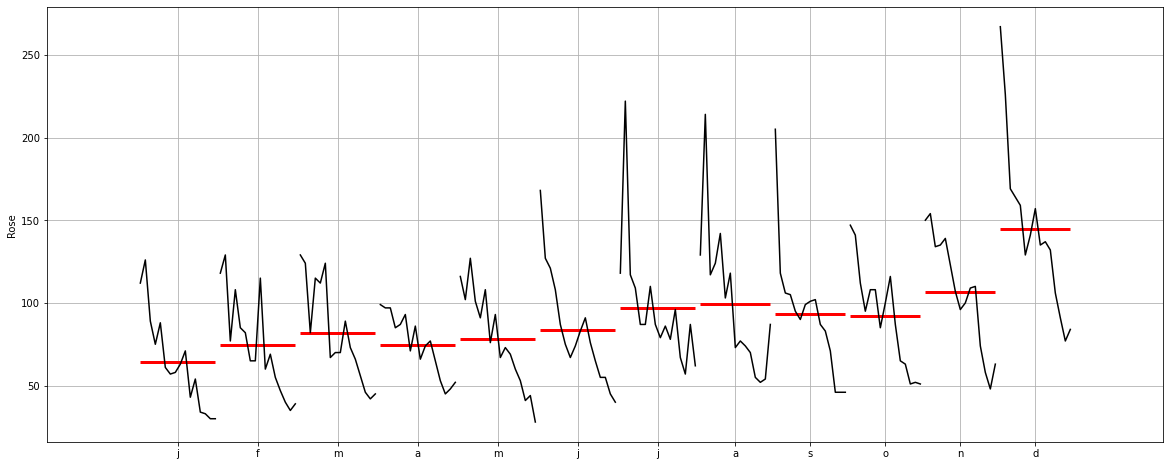

In [28]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df1['Rose'],ylabel='Rose')
plt.grid();

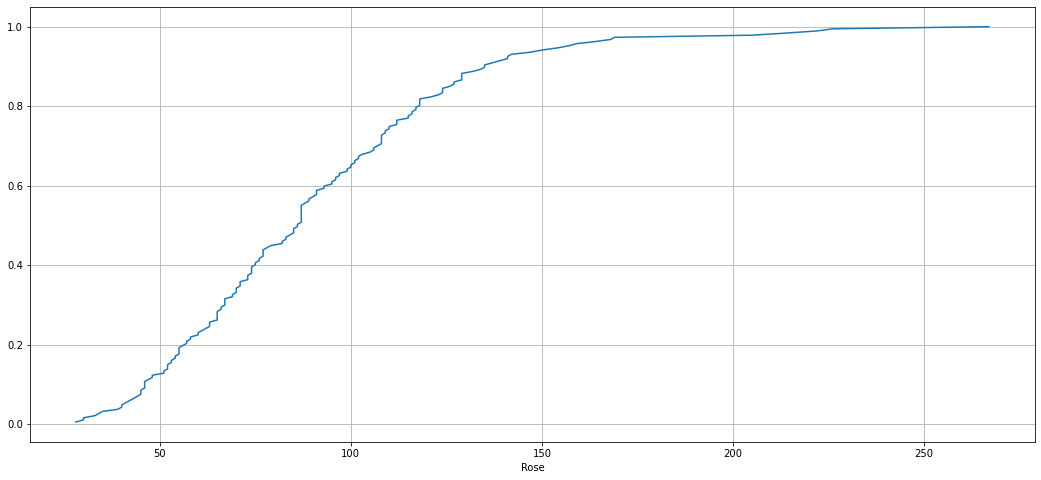

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf1 = ECDF(df1['Rose'])
plt.plot(cdf1.x, cdf1.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

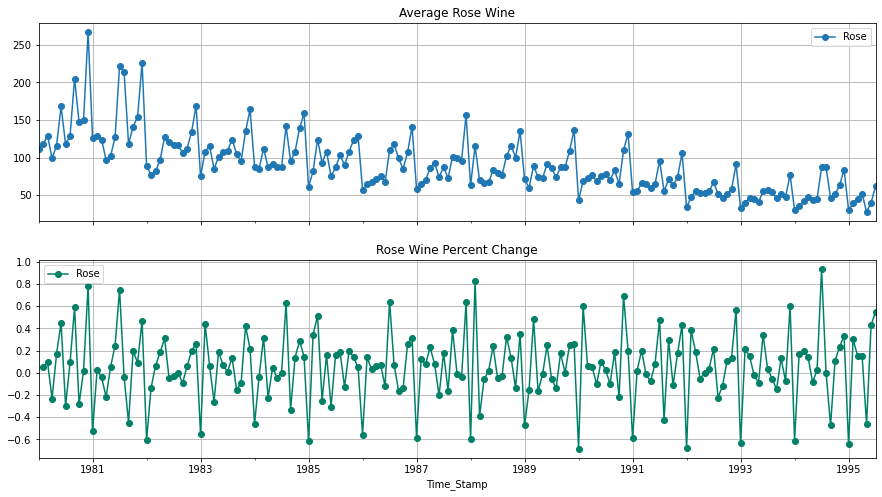

In [30]:
average    = df1.groupby(df1.index)["Rose"].mean()
pct_change = df1.groupby(df1.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Percent Change",grid=True)

In [31]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

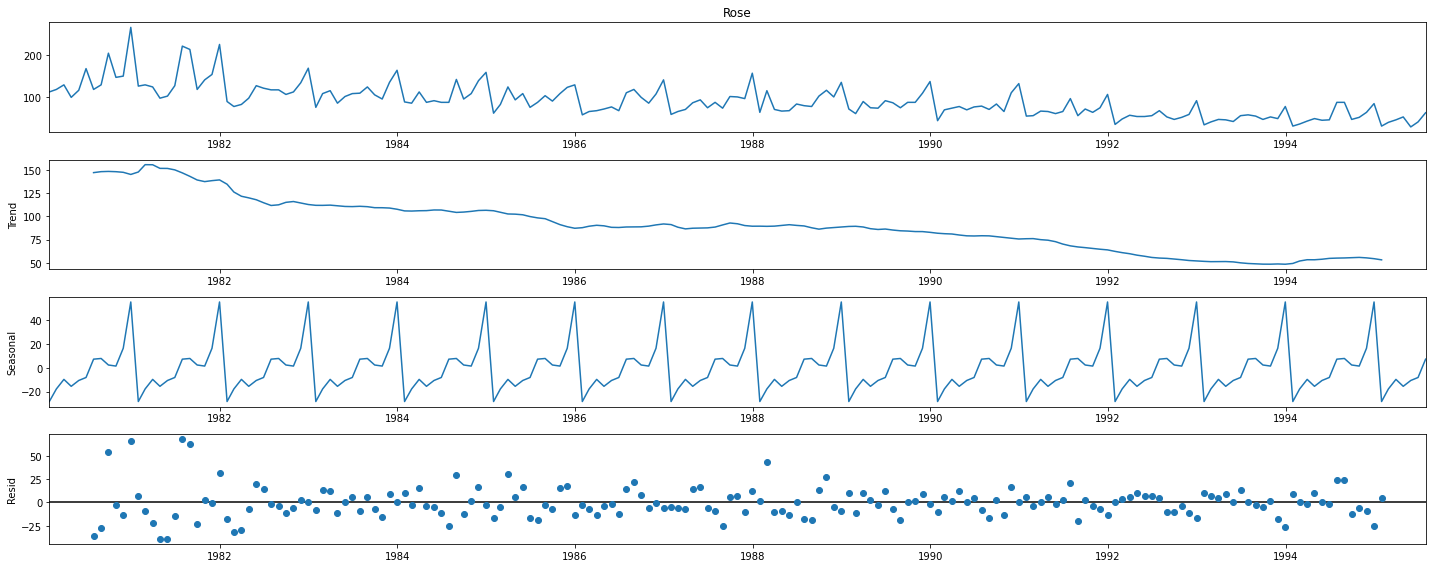

In [32]:
decomposition = seasonal_decompose(df1['Rose'],model='additive')
decomposition.plot();

In [33]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -28.366286
1980-02-29   -17.803191
1980-03-31    -9.776405
1980-04-30   -15.588905
1980-05-31   -10.687120
1980-06-30    -8.169263
1980-07-31     7.217047
1980-08-31     7.797603
1980-09-30     2.317047
1980-10-31     1.414269
1980-11-30    16.389269
1980-12-31    55.255936
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.300380
1980-08-31   -26.922603
1980-09-30    54.307953
1980-10-31    -2.497603
1980-11-30   -13.805936
1980-12-31    66.61

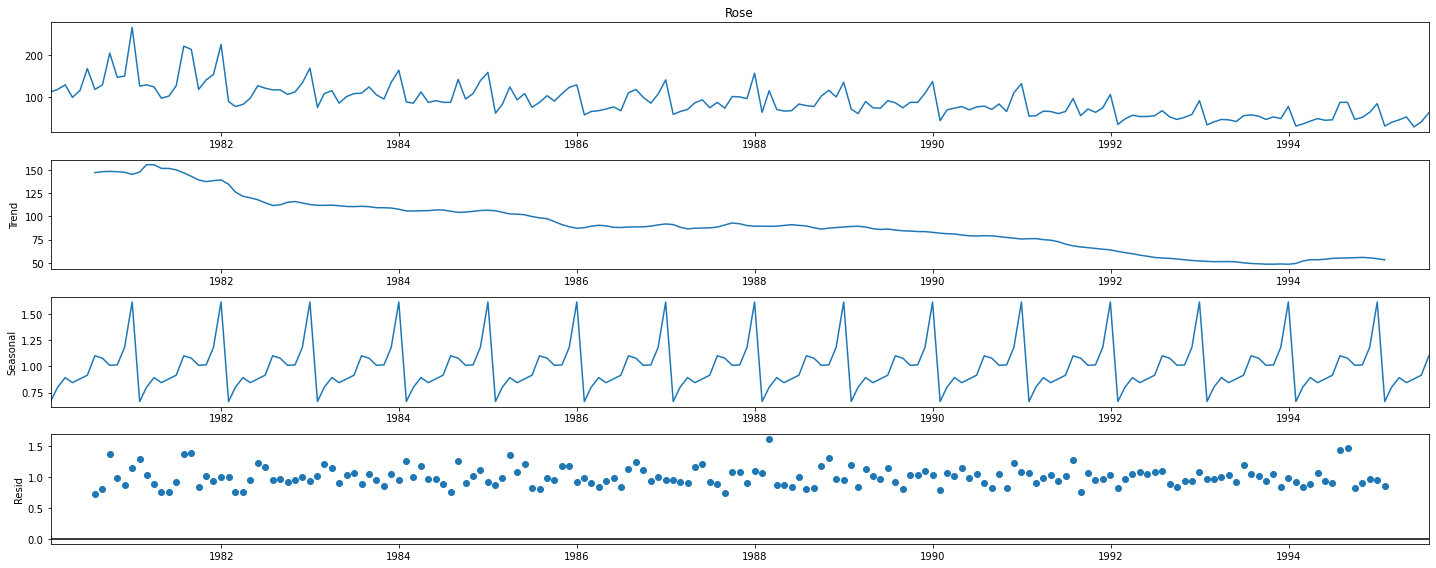

In [34]:
decomposition = seasonal_decompose(df1['Rose'],model='multiplicative')
decomposition.plot();

In [35]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.664786
1980-02-29    0.801065
1980-03-31    0.893064
1980-04-30    0.844700
1980-05-31    0.881101
1980-06-30    0.915798
1980-07-31    1.100878
1980-08-31    1.078154
1980-09-30    1.010107
1980-10-31    1.014279
1980-11-30    1.181876
1980-12-31    1.614193
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.728751
1980-08-31    0.807756
1980-09-30    1.367810
1980-10-31    0.978710
1980-11-30    0.860940
1980-12-31    1.139761
Name: resid, dtype:

# Sparkling Sales

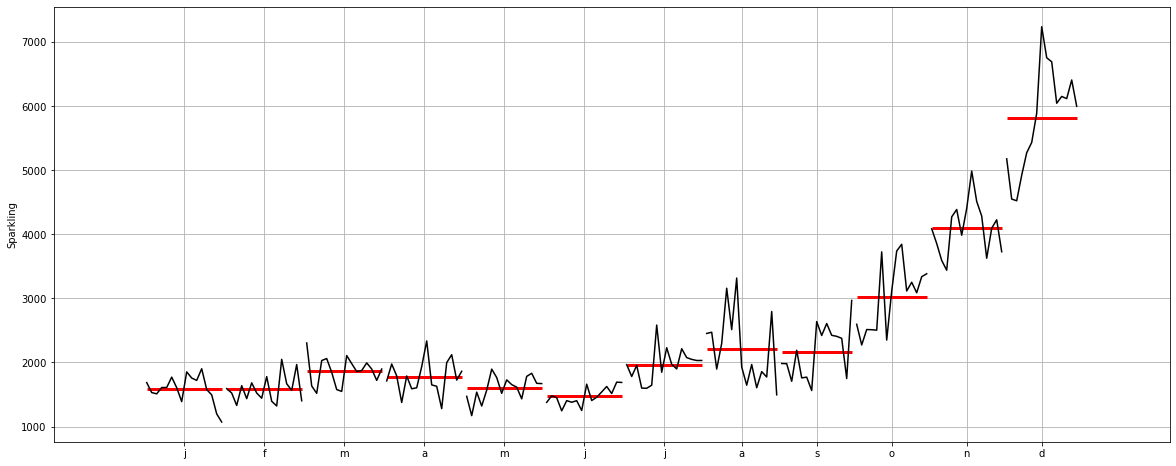

In [36]:
month_plot(df2['Sparkling'],ylabel='Sparkling')
plt.grid();

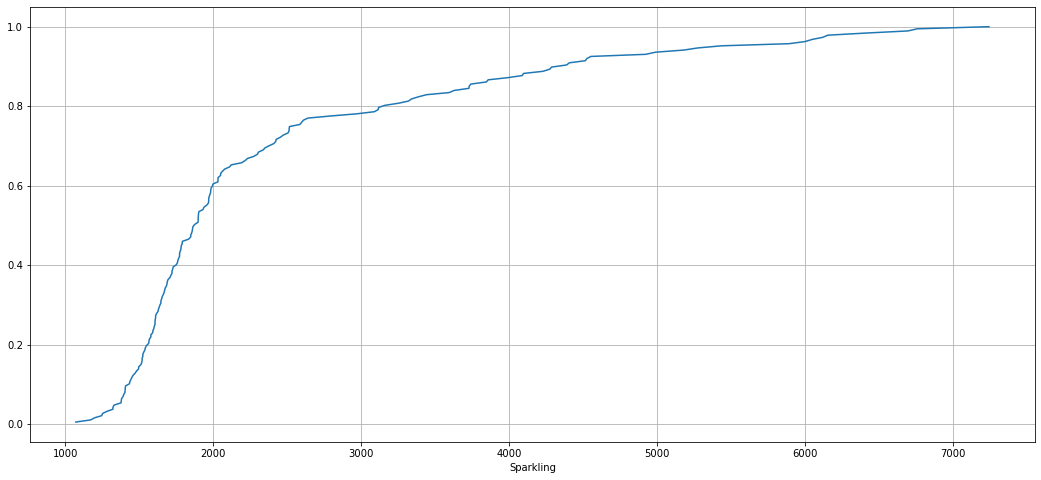

In [37]:
plt.figure(figsize = (18, 8))
cdf1 = ECDF(df2['Sparkling'])
plt.plot(cdf1.x, cdf1.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

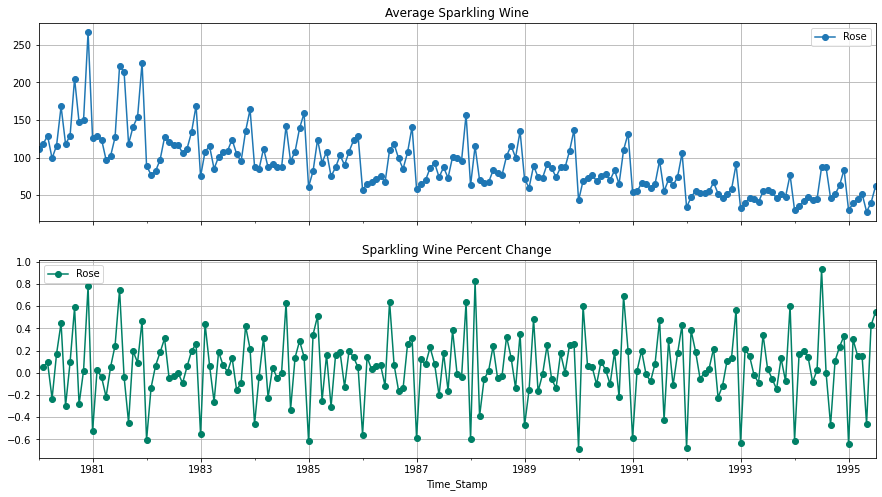

In [38]:
average1    = df2.groupby(df2.index)["Sparkling"].mean()
pct_change1 = df2.groupby(df2.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Percent Change",grid=True)

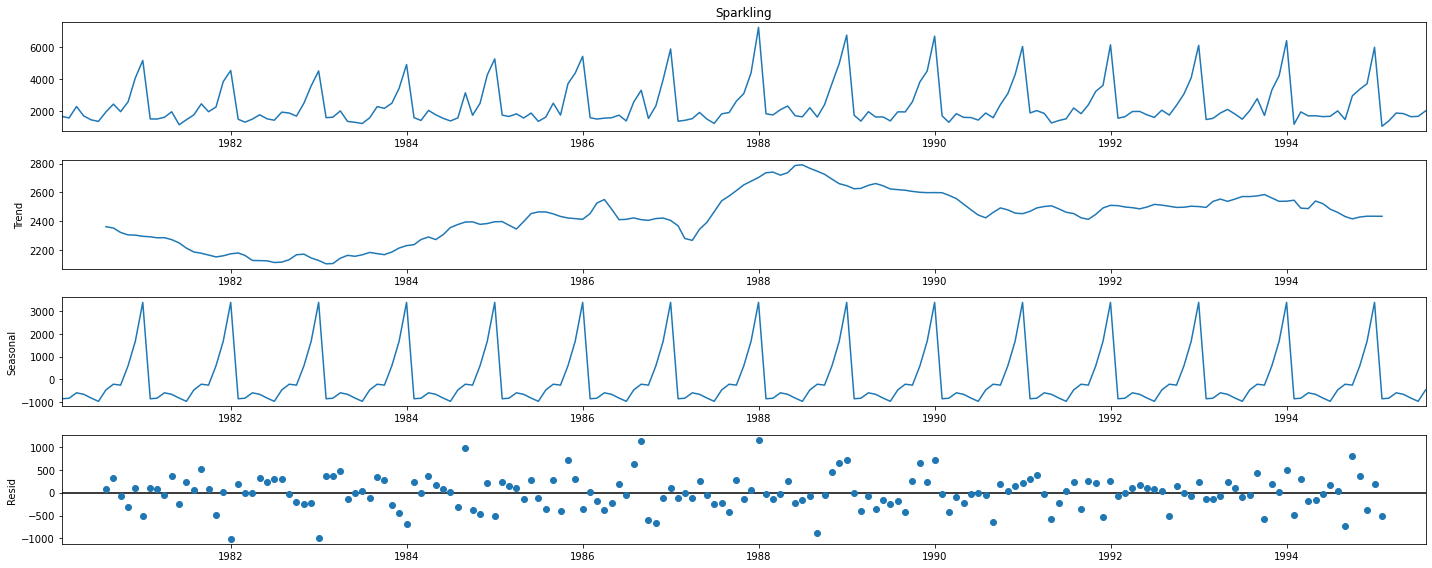

In [39]:
decomposition = seasonal_decompose(df2['Sparkling'],model='additive')
decomposition.plot();

In [40]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

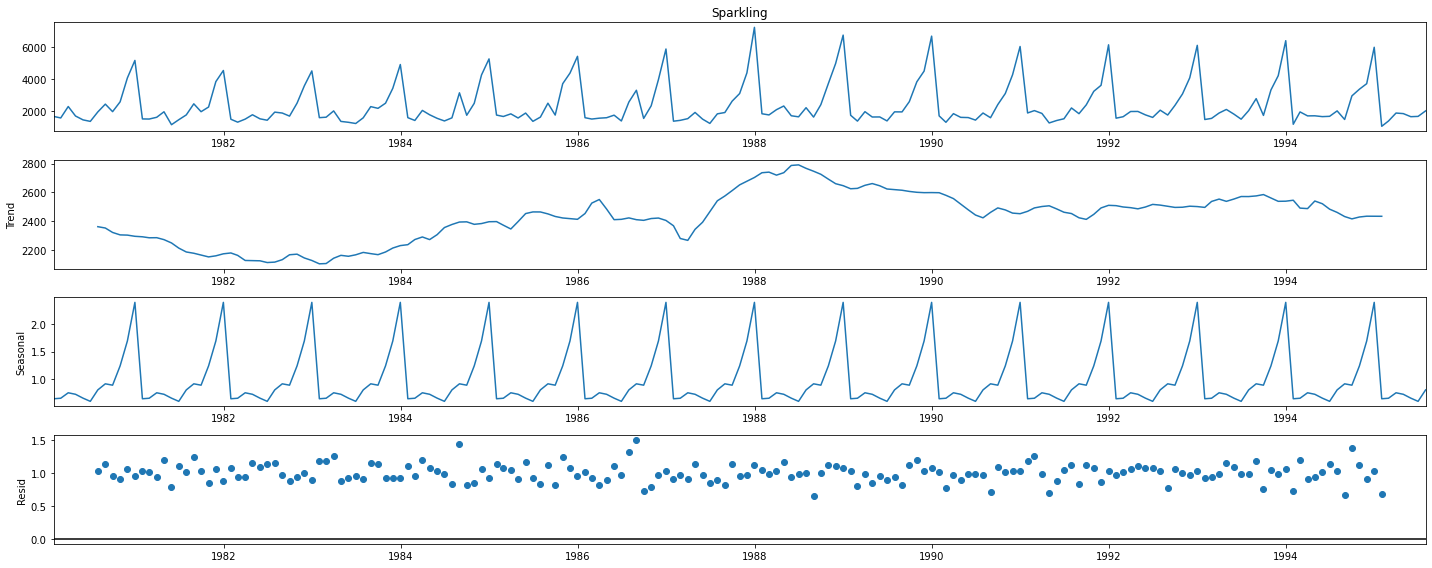

In [41]:
decomposition = seasonal_decompose(df2['Sparkling'],model='multiplicative')
decomposition.plot();

In [42]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

# Check for the stationarity

In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

# Rose

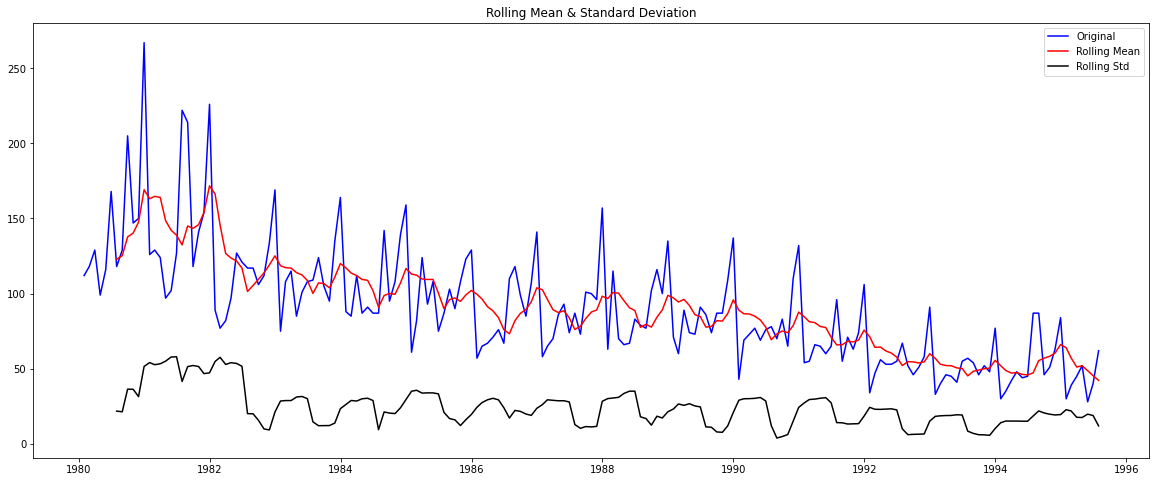

Results of Dickey-Fuller Test:
Test Statistic                  -1.933303
p-value                          0.316560
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [44]:
test_stationarity(df1['Rose'])

**H0**: Not Stationary

**Ha**: Stationary

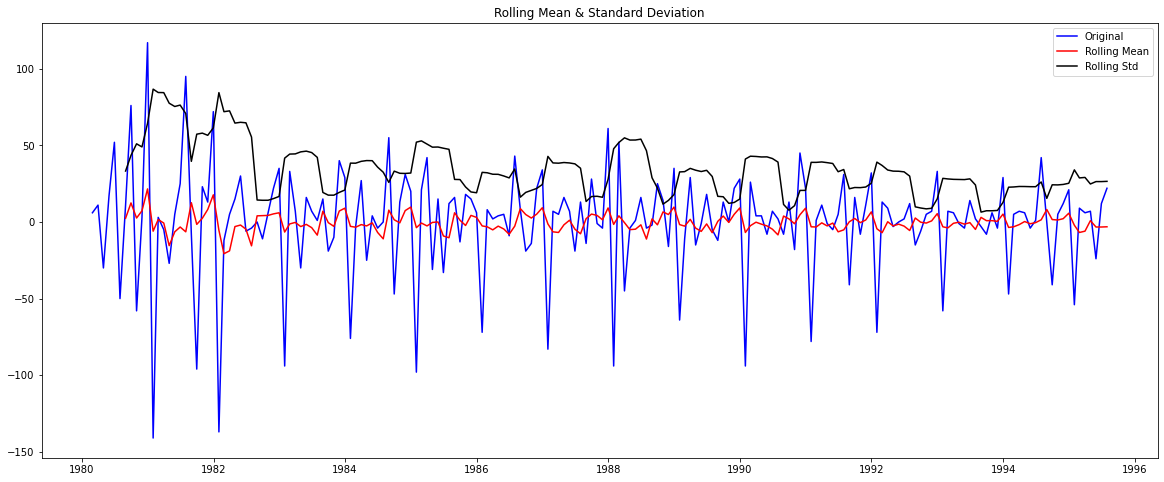

Results of Dickey-Fuller Test:
Test Statistic                -7.883083e+00
p-value                        4.646482e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [45]:
test_stationarity(df1['Rose'].diff().dropna())

# Sparkling

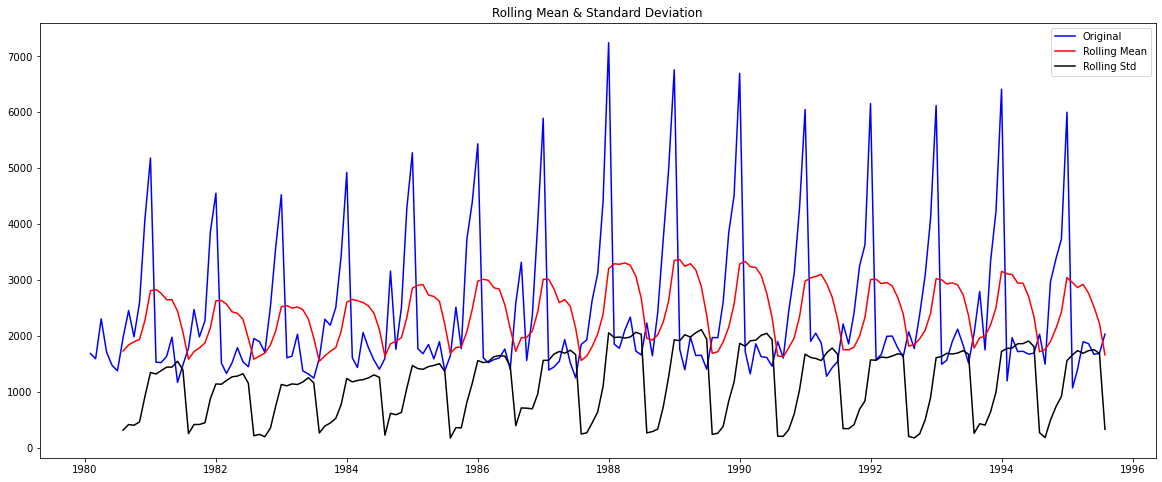

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [46]:
test_stationarity(df2['Sparkling'])

**H0**: Not Stationary

**Ha**: Stationary

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

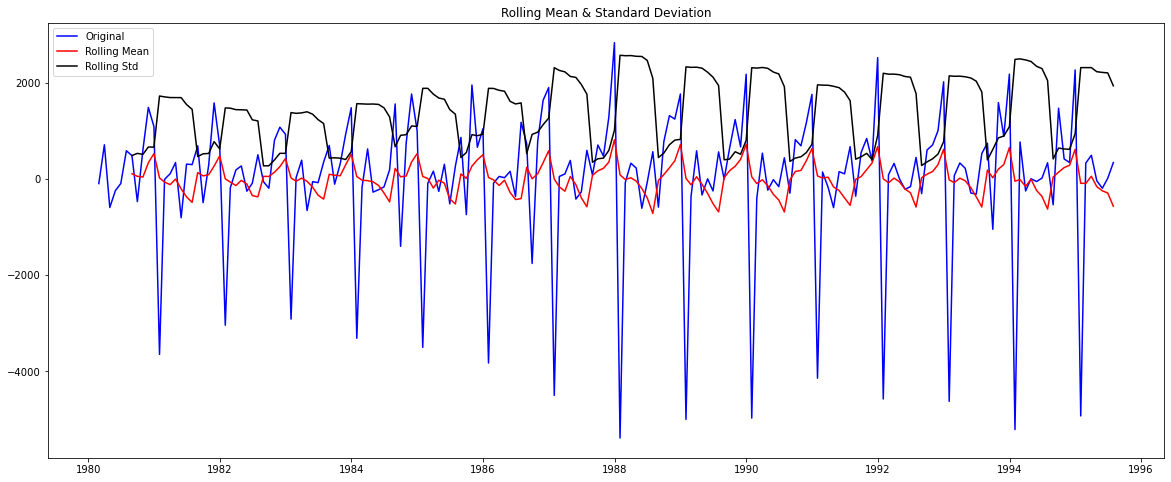

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [47]:
test_stationarity(df2['Sparkling'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Rose Sales

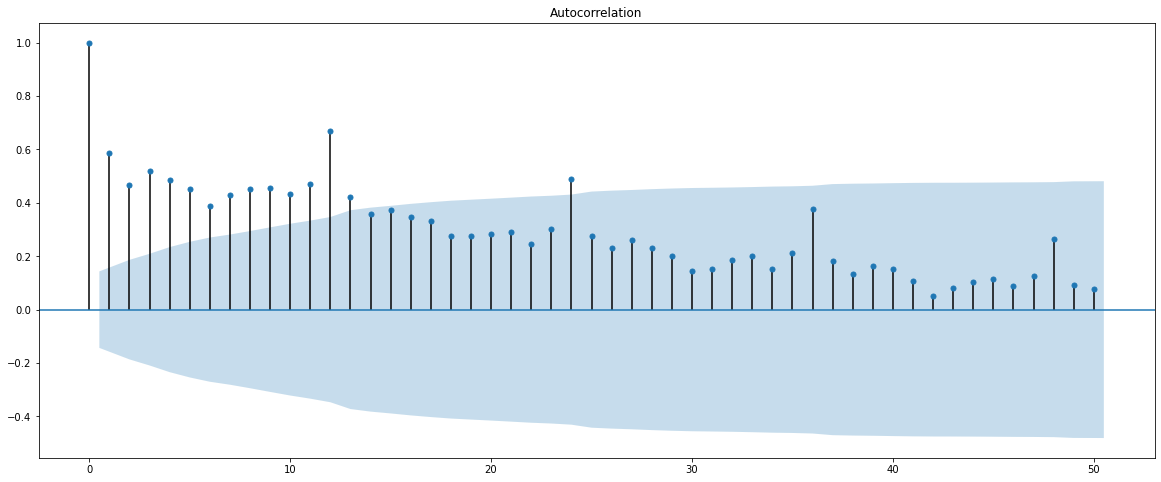

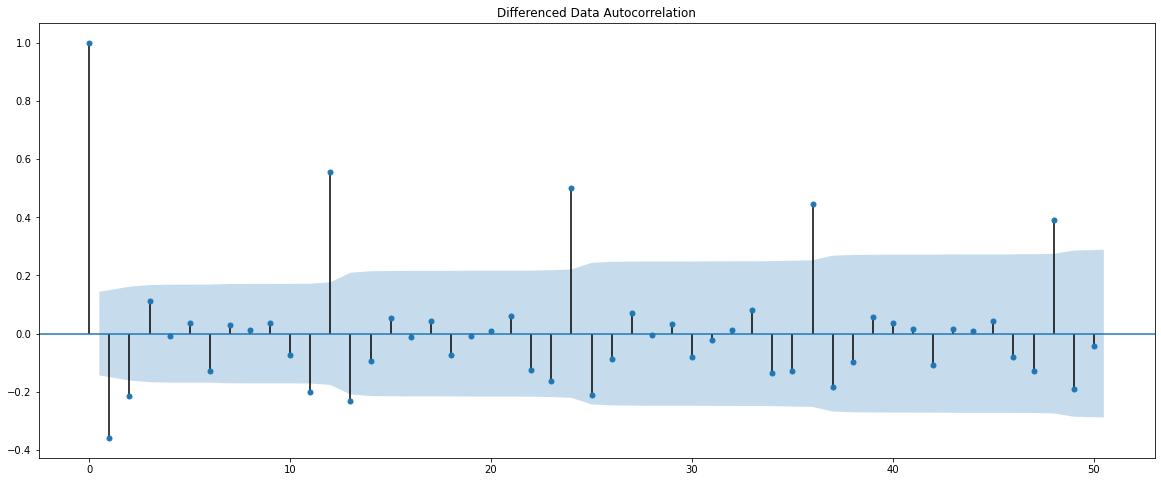

In [49]:
plot_acf(df1['Rose'],lags=50)
plot_acf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

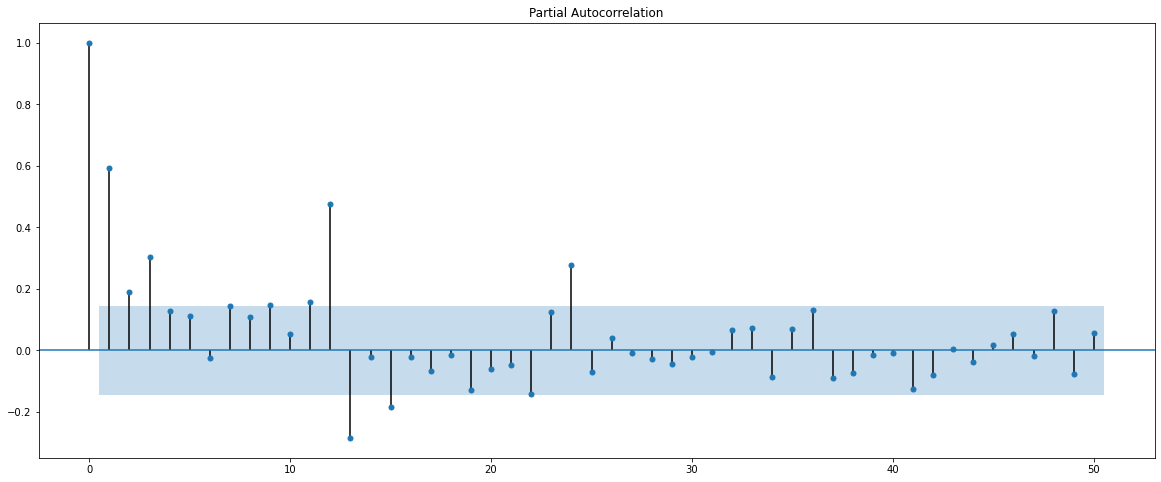

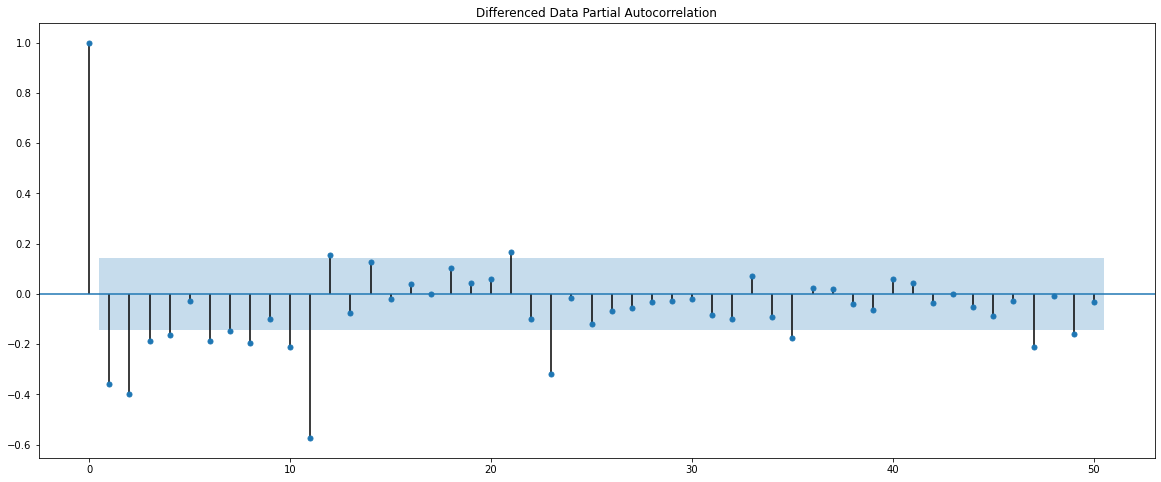

In [50]:
plot_pacf(df1['Rose'],lags=50)
plot_pacf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

# Sparkling sales

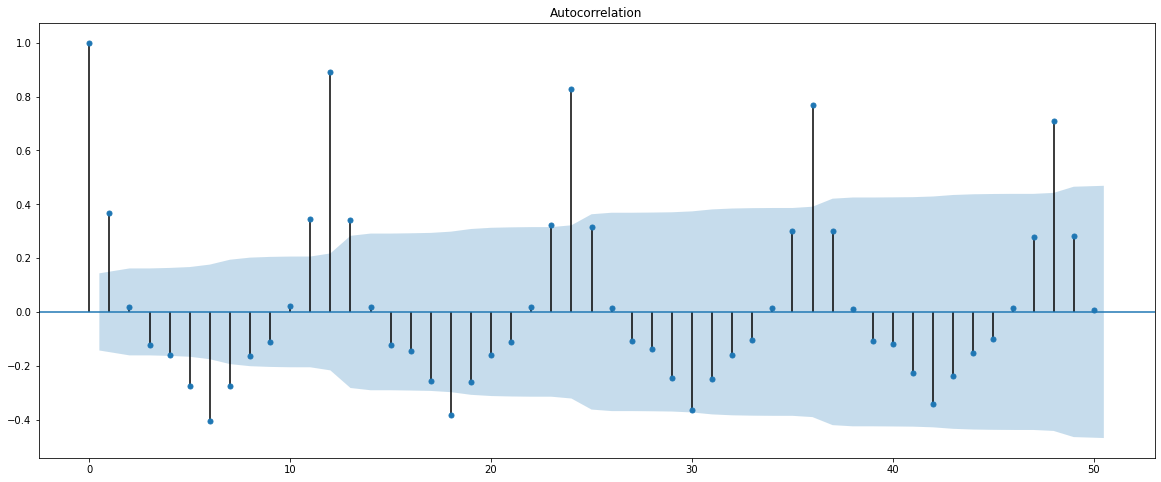

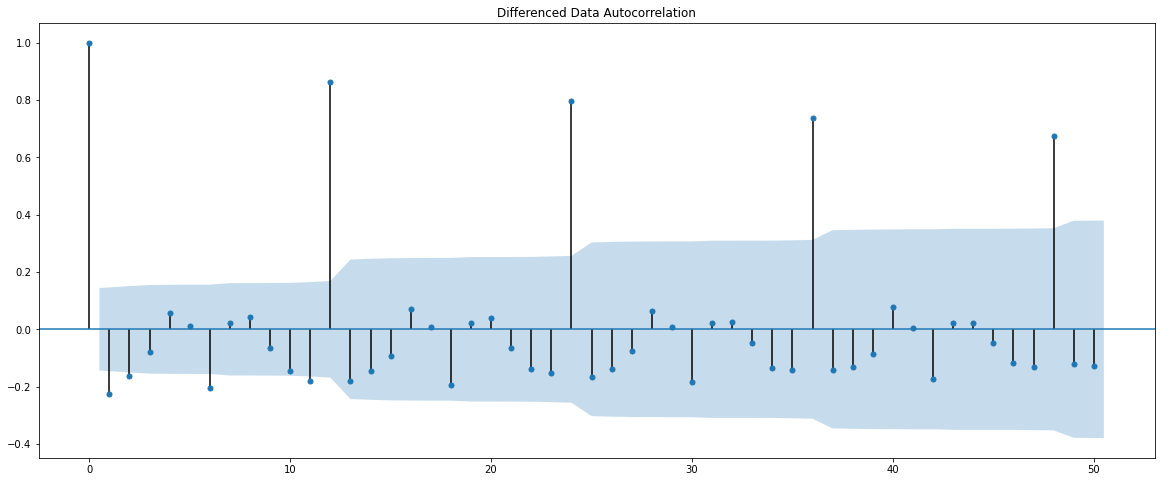

In [51]:
plot_acf(df2['Sparkling'],lags=50)
plot_acf(df2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

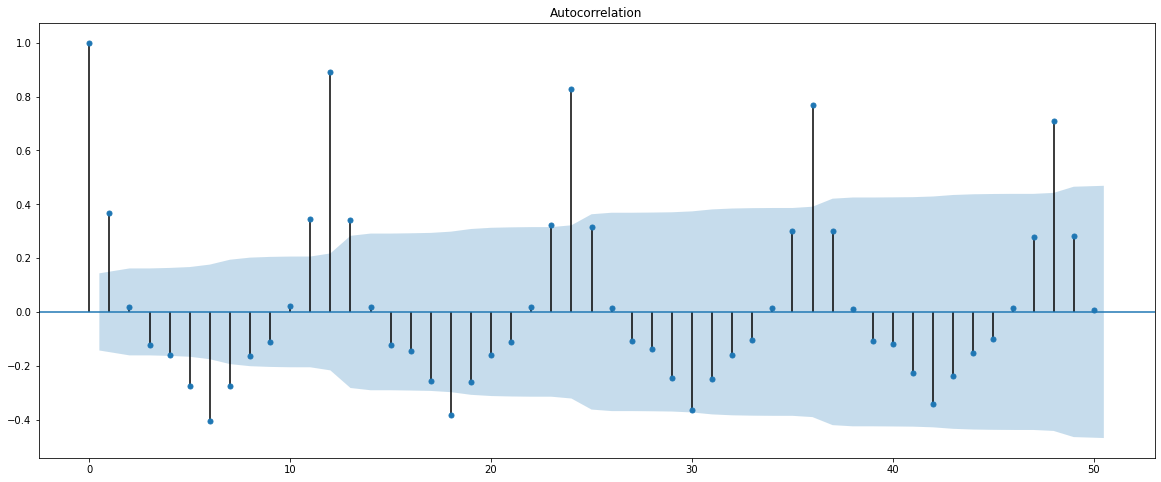

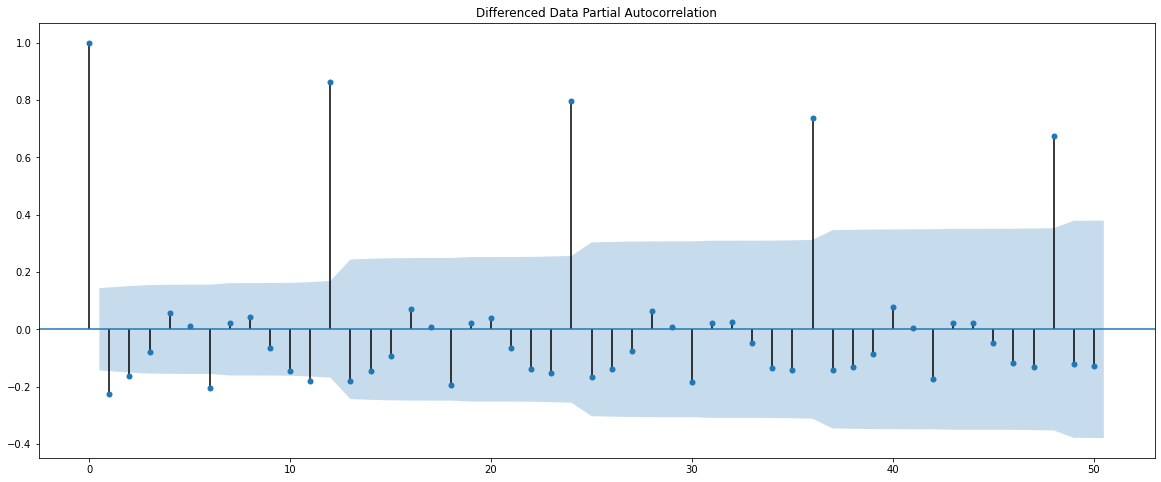

In [52]:
plot_acf(df2['Sparkling'],lags=50)
plot_acf(df2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

# Train-Test Split

## Rose Sales

In [53]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [54]:
from IPython.display import display

In [55]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

Last few rows of Training Data


YearMonth   Rose
Time_Stamp                 
1990-08-31   1990-08   70.0
1990-09-30   1990-09   83.0
1990-10-31   1990-10   65.0
1990-11-30   1990-11  110.0
1990-12-31   1990-12  132.0

First few rows of Test Data


YearMonth  Rose
Time_Stamp                
1991-01-31   1991-01  54.0
1991-02-28   1991-02  55.0
1991-03-31   1991-03  66.0
1991-04-30   1991-04  65.0
1991-05-31   1991-05  60.0

Last few rows of Test Data


YearMonth  Rose
Time_Stamp                
1995-03-31   1995-03  45.0
1995-04-30   1995-04  52.0
1995-05-31   1995-05  28.0
1995-06-30   1995-06  40.0
1995-07-31   1995-07  62.0

In [56]:
print(train.shape)
print(test.shape)

(132, 2)
(55, 2)


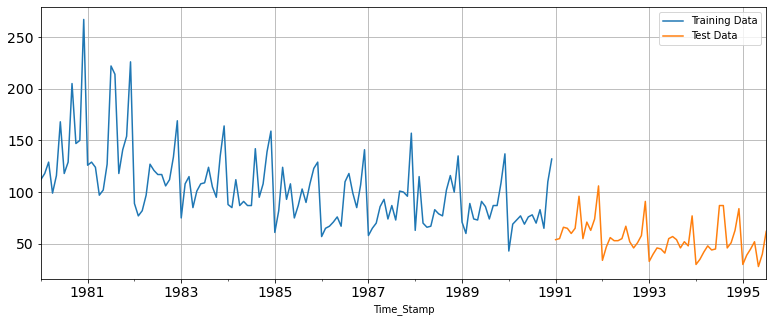

In [57]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Check for train set stationarity

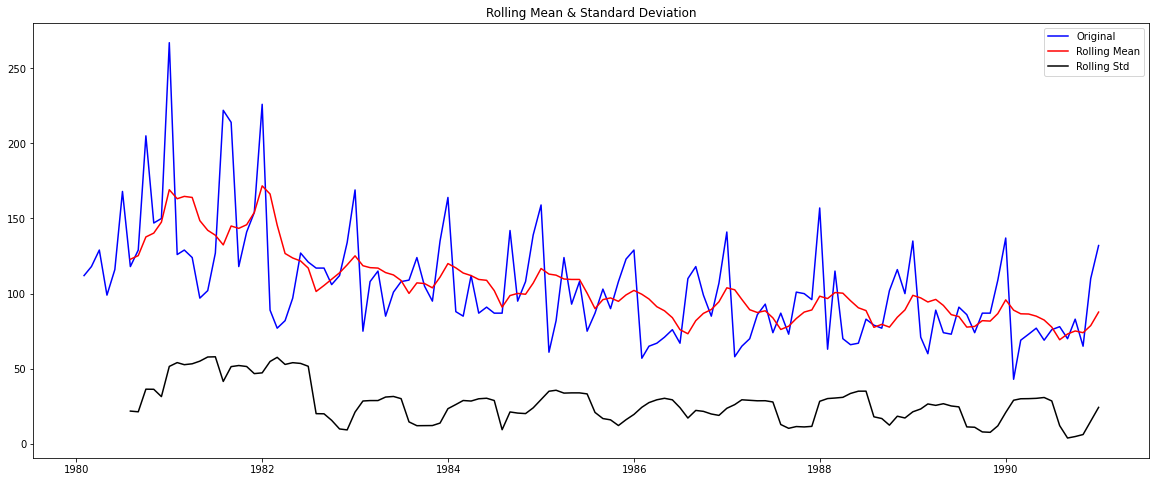

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [58]:
test_stationarity(train['Rose'])

Series is not stationary as the p-value is greater than alpha = 0.05

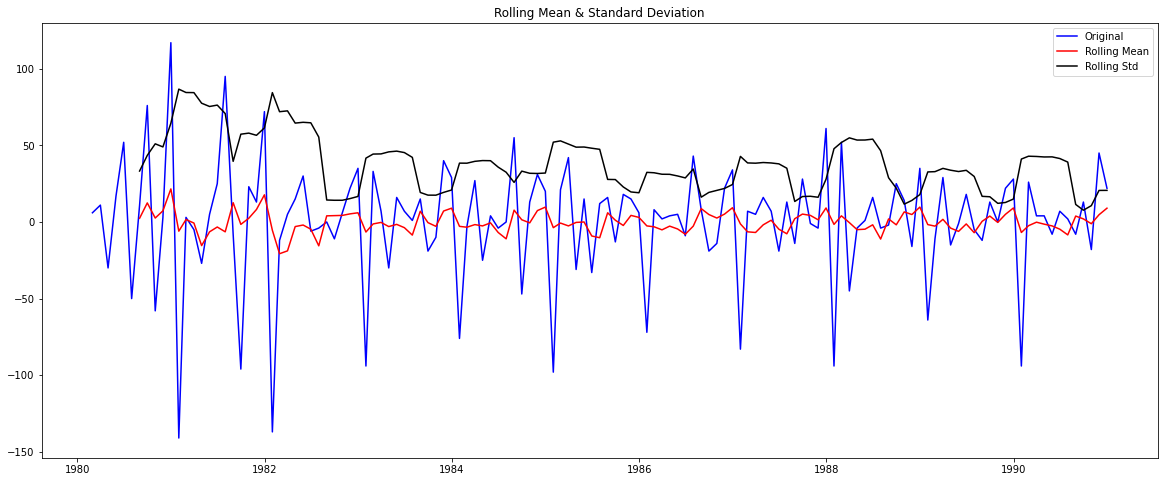

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [59]:
test_stationarity(train['Rose'].diff().dropna())

This is stationary as the value of p is smaller than the value of alpha i.e. 0.05

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  132 non-null    object 
 1   Rose       132 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


# Sparkling Sales

In [61]:
train1=df2[df2.index.year < 1991]
test1=df2[df2.index.year >= 1991]

In [62]:
print('First few rows of Training Data')
display(train1.head())
print('Last few rows of Training Data')
display(train1.tail())
print('First few rows of Test Data')
display(test1.head())
print('Last few rows of Test Data')
display(test1.tail())

First few rows of Training Data


YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

Last few rows of Training Data


YearMonth  Sparkling
Time_Stamp                     
1990-08-31   1990-08       1605
1990-09-30   1990-09       2424
1990-10-31   1990-10       3116
1990-11-30   1990-11       4286
1990-12-31   1990-12       6047

First few rows of Test Data


YearMonth  Sparkling
Time_Stamp                     
1991-01-31   1991-01       1902
1991-02-28   1991-02       2049
1991-03-31   1991-03       1874
1991-04-30   1991-04       1279
1991-05-31   1991-05       1432

Last few rows of Test Data


YearMonth  Sparkling
Time_Stamp                     
1995-03-31   1995-03       1897
1995-04-30   1995-04       1862
1995-05-31   1995-05       1670
1995-06-30   1995-06       1688
1995-07-31   1995-07       2031

In [63]:
print(train1.shape)
print(test1.shape)

(132, 2)
(55, 2)


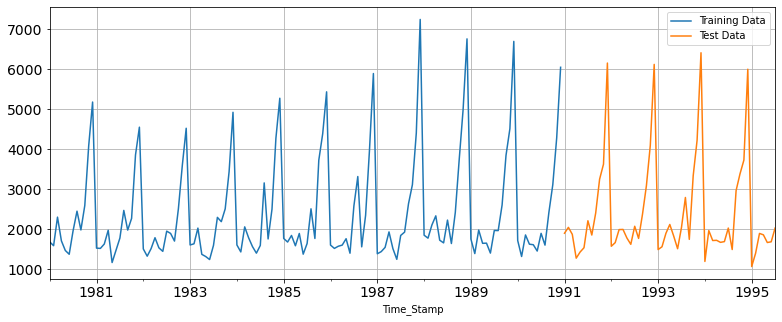

In [64]:
train1['Sparkling'].plot(figsize=(13,5), fontsize=14)
test1['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

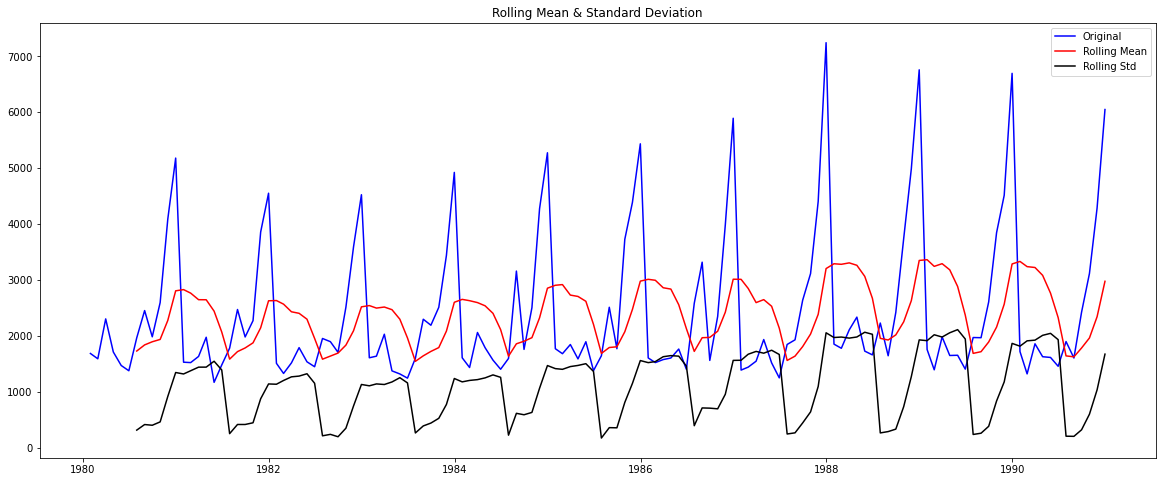

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [65]:
test_stationarity(train1['Sparkling'])

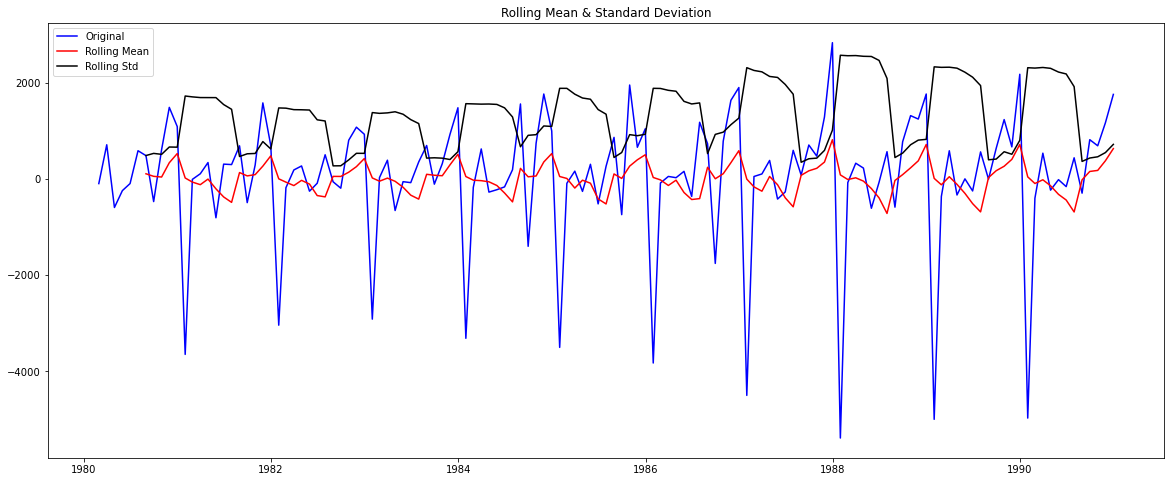

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [66]:
test_stationarity(train1['Sparkling'].diff().dropna())

In [67]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  132 non-null    object
 1   Sparkling  132 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


## Building different models and comparing the accuracy metrics

## Model 1: Linear Regression

### Rose Sales

In [68]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [69]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [70]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
            YearMonth   Rose  time
Time_Stamp                       
1980-01-31   1980-01  112.0     1
1980-02-29   1980-02  118.0     2
1980-03-31   1980-03  129.0     3
1980-04-30   1980-04   99.0     4
1980-05-31   1980-05  116.0     5 

Last few rows of Training Data 
            YearMonth   Rose  time
Time_Stamp                       
1990-08-31   1990-08   70.0   128
1990-09-30   1990-09   83.0   129
1990-10-31   1990-10   65.0   130
1990-11-30   1990-11  110.0   131
1990-12-31   1990-12  132.0   132 

First few rows of Test Data 
            YearMonth  Rose  time
Time_Stamp                      
1991-01-31   1991-01  54.0    43
1991-02-28   1991-02  55.0    44
1991-03-31   1991-03  66.0    45
1991-04-30   1991-04  65.0    46
1991-05-31   1991-05  60.0    47 

Last few rows of Test Data 
            YearMonth  Rose  time
Time_Stamp                      
1995-03-31   1995-03  45.0    93
1995-04-30   1995-04  52.0    94
1995-05-31   1995-05  28.0   

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

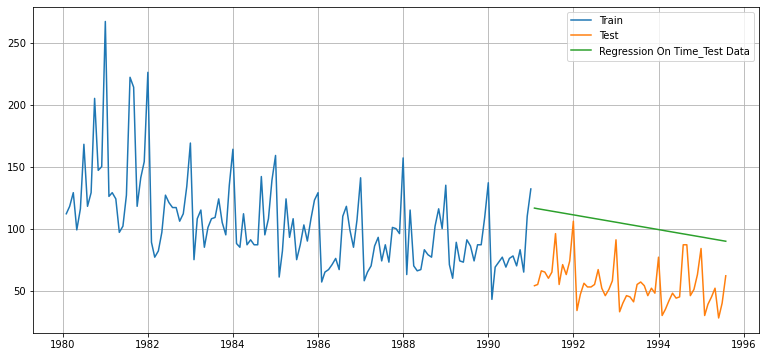

In [74]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [75]:
from sklearn import metrics

In [76]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = metrics.mean_absolute_percentage_error(test['Rose'],test_predictions_model1)*100
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 50.566 MAPE is 101.53


In [77]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE   Test MAPE
RegressionOnTime  50.566395  101.525021

### Sparkling Sales

In [78]:
train_time1 = [i+1 for i in range(len(train1))]
test_time1 = [i+43 for i in range(len(test1))]
print('Training Time instance','\n',train_time1)
print('Test Time instance','\n',test_time1)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [79]:
LinearRegression_train1 = train1.copy()
LinearRegression_test1 = test1.copy()

In [80]:
LinearRegression_train1['time'] = train_time1
LinearRegression_test1['time'] = test_time1

print('First few rows of Training Data','\n',LinearRegression_train1.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train1.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test1.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test1.tail(),'\n')

First few rows of Training Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1980-01-31   1980-01       1686     1
1980-02-29   1980-02       1591     2
1980-03-31   1980-03       2304     3
1980-04-30   1980-04       1712     4
1980-05-31   1980-05       1471     5 

Last few rows of Training Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1990-08-31   1990-08       1605   128
1990-09-30   1990-09       2424   129
1990-10-31   1990-10       3116   130
1990-11-30   1990-11       4286   131
1990-12-31   1990-12       6047   132 

First few rows of Test Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1991-01-31   1991-01       1902    43
1991-02-28   1991-02       2049    44
1991-03-31   1991-03       1874    45
1991-04-30   1991-04       1279    46
1991-05-31   1991-05       1432    47 

Last few rows of Test Data 
            YearMonth  Sparkling  time
Time_Stamp                      

In [81]:
lr.fit(LinearRegression_train1[['time']],LinearRegression_train1['Sparkling'].values)

LinearRegression()

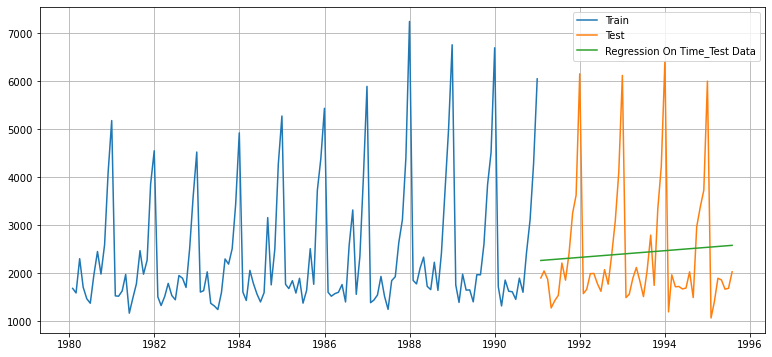

In [82]:
test_predictions_model1         = lr.predict(LinearRegression_test1[['time']])
LinearRegression_test1['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train1['Sparkling'], label='Train')
plt.plot(test1['Sparkling'], label='Test')
plt.plot(LinearRegression_test1['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [83]:
rmse_model1_test1 = metrics.mean_squared_error(test1['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test1 = metrics.mean_absolute_percentage_error(test1['Sparkling'],test_predictions_model1)*100
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test1, mape_model1_test1))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867 MAPE is 39.89


In [84]:
resultsDf1 = pd.DataFrame({'Test RMSE': [rmse_model1_test1],'Test MAPE': [mape_model1_test1]},index=['RegressionOnTime'])
resultsDf1

Test RMSE  Test MAPE
RegressionOnTime  1275.867052   39.88889

# Model 2: Naive Approach

## Rose

In [85]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [86]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

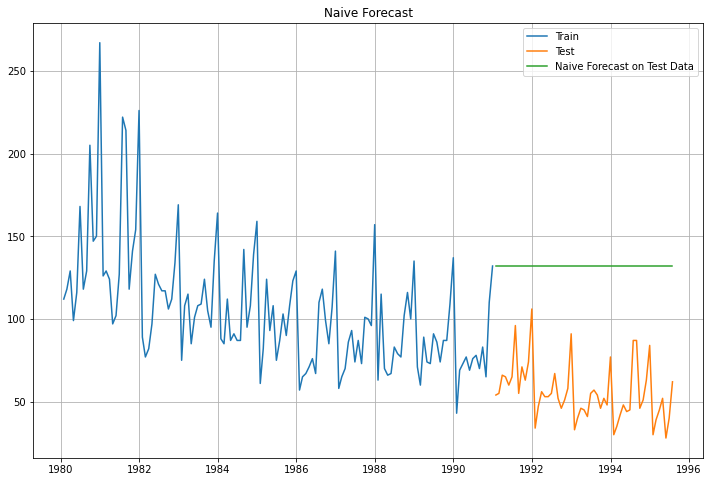

In [87]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [88]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = metrics.mean_absolute_percentage_error(test['Rose'],NaiveModel_test['naive'])*100
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.464 MAPE is 159.81


In [89]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE   Test MAPE
RegressionOnTime  50.566395  101.525021
NaiveModel        78.464236  159.813924

## Sparkling

In [90]:
NaiveModel_train1 = train1.copy()
NaiveModel_test1 = test1.copy()

In [91]:
NaiveModel_test1['naive'] = np.asarray(train1['Sparkling'])[len(np.asarray(train1['Sparkling']))-1]
NaiveModel_test1['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

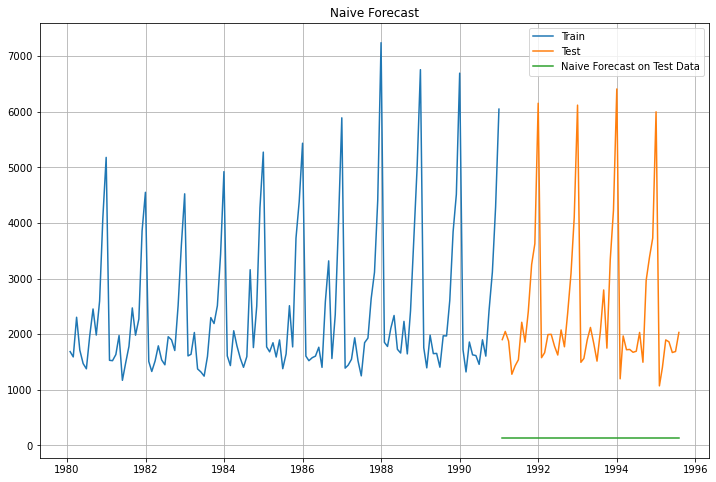

In [92]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train1['Sparkling'], label='Train')
plt.plot(test1['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [93]:
rmse_model2_test1 = metrics.mean_squared_error(test1['Sparkling'],NaiveModel_test1['naive'],squared=False)
mape_model2_test1 = metrics.mean_absolute_percentage_error(test1['Sparkling'],NaiveModel_test1['naive'])*100
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test1, mape_model2_test1))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 201.33


In [94]:
resultsDf1_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test1],'Test MAPE': [mape_model2_test1]},index=['NaiveModel'])

resultsDf1 = pd.concat([resultsDf1, resultsDf1_2])
resultsDf1

Test RMSE  Test MAPE
RegressionOnTime  1275.867052   39.88889
NaiveModel        3864.279352  201.32765

# Method 3: Simple Average

## Rose

In [95]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [96]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

YearMonth  Rose  mean_forecast
Time_Stamp                               
1991-01-31   1991-01  54.0     104.939394
1991-02-28   1991-02  55.0     104.939394
1991-03-31   1991-03  66.0     104.939394
1991-04-30   1991-04  65.0     104.939394
1991-05-31   1991-05  60.0     104.939394

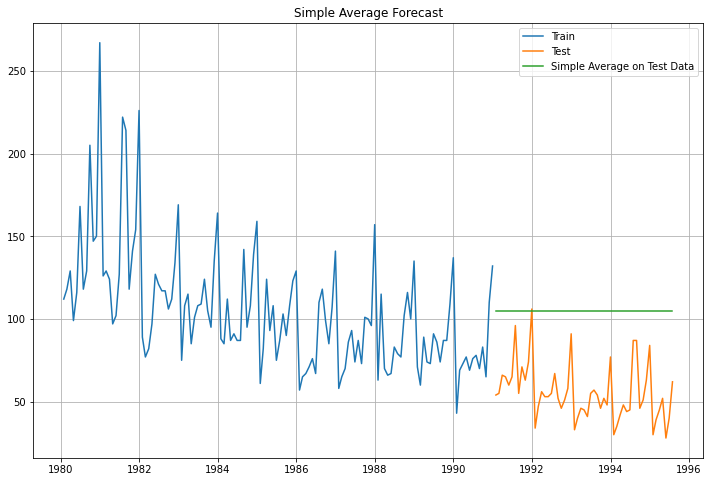

In [97]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [98]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = metrics.mean_absolute_percentage_error(test['Rose'],SimpleAverage_test['mean_forecast'])*100
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.357 MAPE is 106.59


In [99]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE   Test MAPE
RegressionOnTime    50.566395  101.525021
NaiveModel          78.464236  159.813924
SimpleAverageModel  52.357042  106.587261

## Sprakling

In [100]:
SimpleAverage_train1 = train1.copy()
SimpleAverage_test1 = test1.copy()

In [101]:
SimpleAverage_test1['mean_forecast'] = train1['Sparkling'].mean()
SimpleAverage_test1.head()

YearMonth  Sparkling  mean_forecast
Time_Stamp                                    
1991-01-31   1991-01       1902    2403.780303
1991-02-28   1991-02       2049    2403.780303
1991-03-31   1991-03       1874    2403.780303
1991-04-30   1991-04       1279    2403.780303
1991-05-31   1991-05       1432    2403.780303

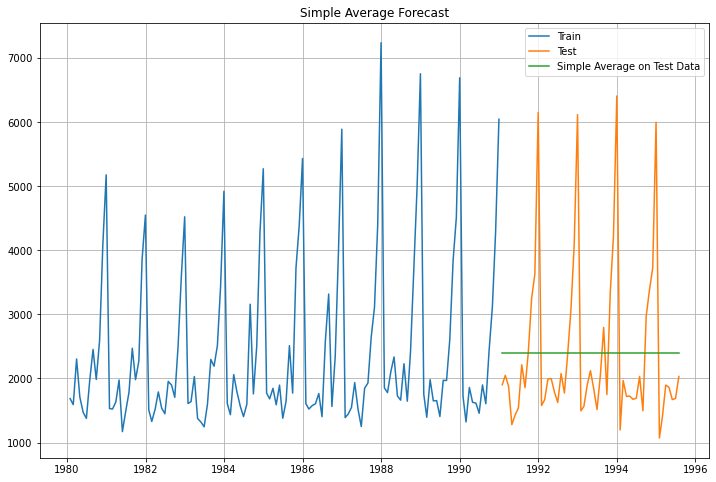

In [102]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train1['Sparkling'], label='Train')
plt.plot(SimpleAverage_test1['Sparkling'], label='Test')
plt.plot(SimpleAverage_test1['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [103]:
rmse_model3_test1 = metrics.mean_squared_error(test1['Sparkling'],SimpleAverage_test1['mean_forecast'],squared=False)
mape_model3_test1 = metrics.mean_absolute_percentage_error(test1['Sparkling'],SimpleAverage_test1['mean_forecast'])*100
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test1, mape_model3_test1))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 39.16


In [104]:
resultsDf1_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test1],'Test MAPE': [mape_model3_test1]}
                           ,index=['SimpleAverageModel'])

resultsDf1 = pd.concat([resultsDf1, resultsDf1_3])
resultsDf1

Test RMSE   Test MAPE
RegressionOnTime    1275.867052   39.888890
NaiveModel          3864.279352  201.327650
SimpleAverageModel  1275.081804   39.157336

# Model 4: Simple Exponential Smoothing

## Rose

In [105]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [106]:
SES_train = train.copy()
SES_test = test.copy()

In [107]:
SES_train.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [108]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [109]:
model_SES_autofit = model_SES.fit(optimized=True)

In [110]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [111]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

YearMonth  Rose    predict
Time_Stamp                           
1991-01-31   1991-01  54.0  87.104983
1991-02-28   1991-02  55.0  87.104983
1991-03-31   1991-03  66.0  87.104983
1991-04-30   1991-04  65.0  87.104983
1991-05-31   1991-05  60.0  87.104983

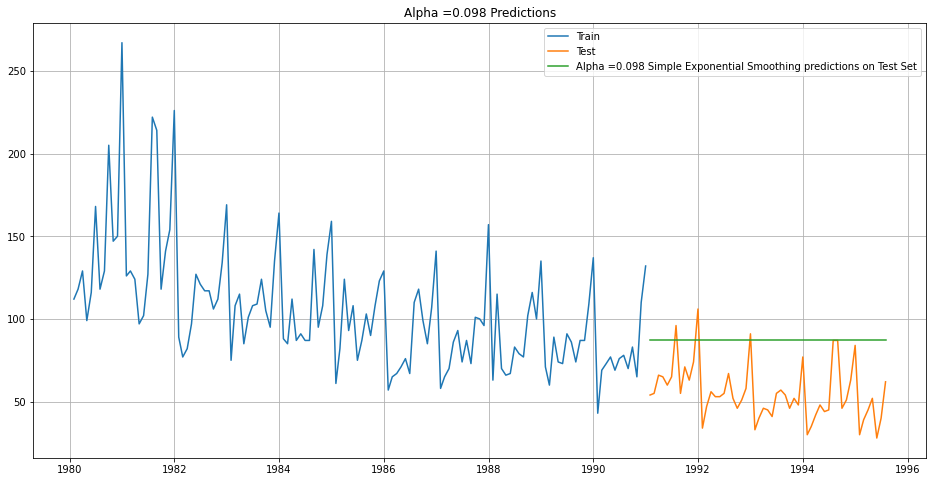

In [112]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

In [113]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = metrics.mean_absolute_percentage_error(SES_test['Rose'],SES_test['predict'])*100
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1,mape_model5_test_1))


For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 35.931 MAPE is 72.59


In [114]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE   Test MAPE
RegressionOnTime                        50.566395  101.525021
NaiveModel                              78.464236  159.813924
SimpleAverageModel                      52.357042  106.587261
Alpha=0.098,SimpleExponentialSmoothing  35.930728   72.588409

## Sparkling

In [115]:
SES_train1 = train1.copy()
SES_test1 = test1.copy()

In [116]:
model_SES1 = SimpleExpSmoothing(SES_train1['Sparkling'])

In [117]:
model_SES_autofit1 = model_SES1.fit(optimized=True)

In [118]:
model_SES_autofit1.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [119]:
SES_test1['predict'] = model_SES_autofit1.forecast(steps=len(test))
SES_test1.head()

YearMonth  Sparkling      predict
Time_Stamp                                  
1991-01-31   1991-01       1902  2724.932624
1991-02-28   1991-02       2049  2724.932624
1991-03-31   1991-03       1874  2724.932624
1991-04-30   1991-04       1279  2724.932624
1991-05-31   1991-05       1432  2724.932624

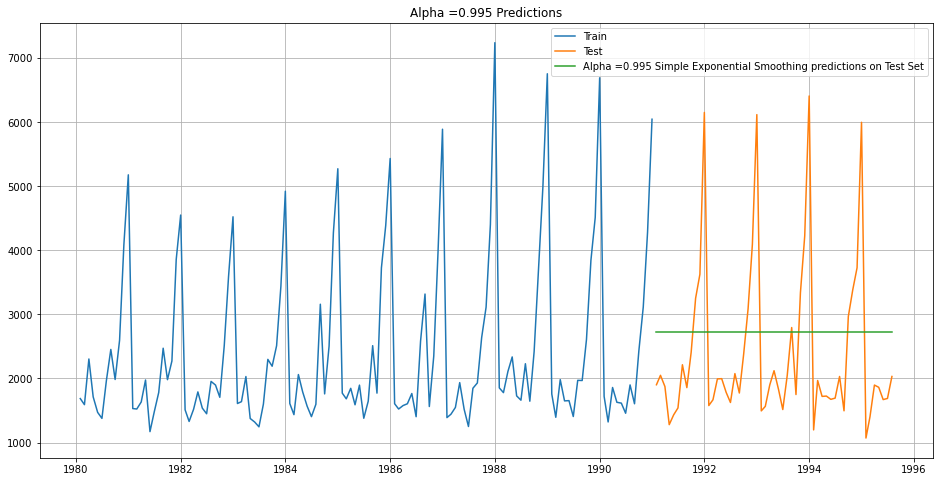

In [120]:
plt.figure(figsize=(16,8))
plt.plot(SES_train1['Sparkling'], label='Train')
plt.plot(SES_test1['Sparkling'], label='Test')

plt.plot(SES_test1['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [121]:
rmse_model5_test1_1 = metrics.mean_squared_error(SES_test1['Sparkling'],SES_test1['predict'],squared=False)
mape_model5_test1_1 = metrics.mean_absolute_percentage_error(SES_test1['Sparkling'],SES_test1['predict'])*100
print("For Alpha =0.096 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test1_1,mape_model5_test1_1))


For Alpha =0.096 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035 MAPE is 50.94


In [122]:
resultsDf1_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test1_1],'Test MAPE': [mape_model5_test1_1]}
                           ,index=['Alpha=0.096,SimpleExponentialSmoothing'])

resultsDf1 = pd.concat([resultsDf1, resultsDf1_5])
resultsDf1

Test RMSE   Test MAPE
RegressionOnTime                        1275.867052   39.888890
NaiveModel                              3864.279352  201.327650
SimpleAverageModel                      1275.081804   39.157336
Alpha=0.096,SimpleExponentialSmoothing  1316.035487   50.940345

# Method 5: Double Exponential Smoothing (Holt's Model)

## Rose

In [123]:
DES_train = train.copy()
DES_test = test.copy()

In [124]:
model_DES = Holt(DES_train['Rose'])

In [125]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [126]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = metrics.mean_absolute_percentage_error(DES_train['Rose'],DES_train['predict',i,j])*100
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = metrics.mean_absolute_percentage_error(DES_test['Rose'],DES_test['predict',i,j])*100
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [127]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE    Test MAPE
0            0.3          0.3   35.928003   26.886351  263.667269   497.743907
1            0.3          0.4   37.356026   28.273170  356.814061   667.644031
2            0.3          0.5   38.828384   29.678552  449.852714   837.360530
3            0.3          0.6   40.201555   31.193220  534.984571   992.834470
4            0.3          0.7   41.313274   32.486528  599.640357  1111.189434
..           ...          ...         ...         ...         ...          ...
59           1.0          0.6   51.828562   38.543715  799.697606  1483.598738
60           1.0          0.7   54.493671   40.613592  839.907149  1556.616425
61           1.0          0.8   57.362069   42.781319  851.979321  1578.537251
62           1.0          0.9   60.470112   45.084116  832.725993  1543.576487
63           1.0          1.0   63.869184   47.761668  778.098603  1444.373261

[64 rows x 6 columns]

In [128]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE   Test MAPE
0            0.3          0.3   35.928003   26.886351  263.667269  497.743907
8            0.4          0.3   36.733732   27.216106  337.382760  634.791236
1            0.3          0.4   37.356026   28.273170  356.814061  667.644031
16           0.5          0.3   37.424080   27.210064  392.337522  737.033422
24           0.6          0.3   38.343309   27.478682  437.353770  820.752298

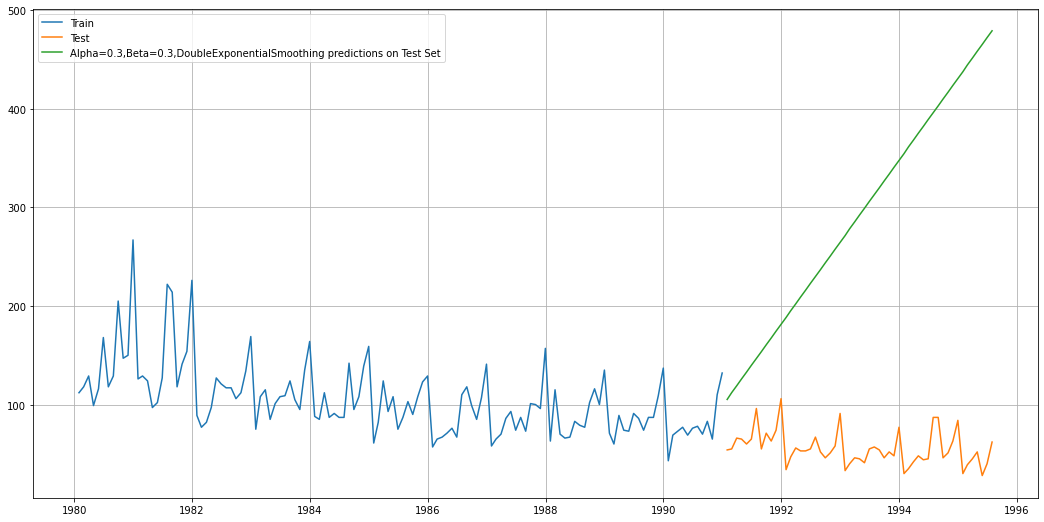

In [129]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [130]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE   Test MAPE
RegressionOnTime                                50.566395  101.525021
NaiveModel                                      78.464236  159.813924
SimpleAverageModel                              52.357042  106.587261
Alpha=0.098,SimpleExponentialSmoothing          35.930728   72.588409
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  263.667269  497.743907

### Sparkling

In [131]:
DES_train1 = train1.copy()
DES_test1 = test1.copy()

In [132]:
model_DES1 = Holt(DES_train1['Sparkling'])

In [133]:
resultsDf1_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf1_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [134]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train1['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test1['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train1 = metrics.mean_squared_error(DES_train1['Sparkling'],DES_train1['predict',i,j],squared=False)
        mape_model6_train1 = metrics.mean_absolute_percentage_error(DES_train1['Sparkling'],DES_train1['predict',i,j])*100
        
        rmse_model6_test1 = metrics.mean_squared_error(DES_test1['Sparkling'],DES_test1['predict',i,j],squared=False)
        mape_model6_test1 = metrics.mean_absolute_percentage_error(DES_test1['Sparkling'],DES_test1['predict',i,j])*100
        
        resultsDf1_7 = resultsDf1_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train1
                                      ,'Train MAPE': mape_model6_train1,'Test RMSE':rmse_model6_test1
                                      ,'Test MAPE':mape_model6_test1}, ignore_index=True)

In [135]:
resultsDf1_7

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.3          0.3  2640.942698   94.701563  2463.486554  85.413964
1            0.3          0.4  2640.677439   94.719393  2395.900635  81.337113
2            0.3          0.5  2640.112488   94.748547  2330.121572  77.263234
3            0.3          0.6  2639.241582   94.791911  2271.478898  73.529400
4            0.3          0.7  2638.168029   94.846215  2227.902119  70.684854
..           ...          ...          ...         ...          ...        ...
59           1.0          0.6  2637.399604   94.887818  2095.702270  62.277078
60           1.0          0.7  2637.219184   94.896688  2071.720644  60.734617
61           1.0          0.8  2637.011652   94.907179  2064.619848  60.271551
62           1.0          0.9  2636.779264   94.919401  2075.966506  61.010079
63           1.0          1.0  2636.529658   94.933083  2108.789946  63.105696

[64 rows x 6 columns]

In [136]:
resultsDf1_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
39           0.7          1.0  2638.440460   94.839934  1919.206072  52.389354
31           0.6          1.0  2638.799686   94.832720  1931.816997  52.929857
47           0.8          1.0  2637.867557   94.864474  1933.295774  52.952277
38           0.7          0.9  2638.459067   94.841750  1951.168591  53.708058
46           0.8          0.9  2637.992938   94.859578  1955.184546  53.881873

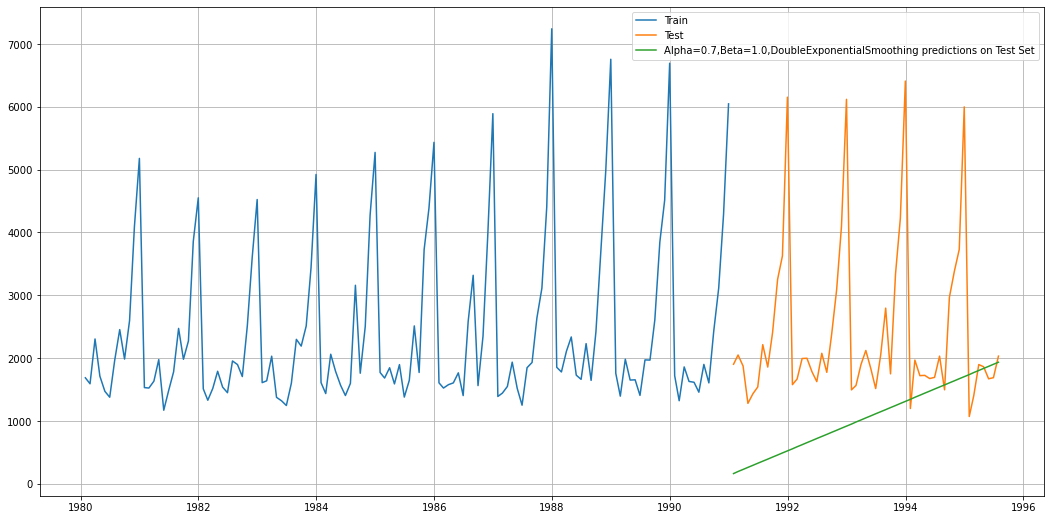

In [137]:
plt.figure(figsize=(18,9))
plt.plot(DES_train1['Sparkling'], label='Train')
plt.plot(DES_test1['Sparkling'], label='Test')

plt.plot(DES_test1['predict',0.7000000000000002, 1.0000000000000002], label='Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [138]:
resultsDf1_7_1 = pd.DataFrame({'Test RMSE': [resultsDf1_7['Test RMSE'][0]],'Test MAPE':[resultsDf1_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing'])

resultsDf1 = pd.concat([resultsDf1, resultsDf1_7_1])
resultsDf1

Test RMSE   Test MAPE
RegressionOnTime                               1275.867052   39.888890
NaiveModel                                     3864.279352  201.327650
SimpleAverageModel                             1275.081804   39.157336
Alpha=0.096,SimpleExponentialSmoothing         1316.035487   50.940345
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing  2463.486554   85.413964

## Method 6: Triple Exponential Smoothing (Holt - Winter's Model)

## Rose

In [139]:
TES_train = train.copy()
TES_test = test.copy()

In [140]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [141]:
model_TES_autofit = model_TES.fit()

In [142]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [143]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

YearMonth  Rose  auto_predict
Time_Stamp                              
1991-01-31   1991-01  54.0     56.689174
1991-02-28   1991-02  55.0     64.129166
1991-03-31   1991-03  66.0     69.856436
1991-04-30   1991-04  65.0     60.877474
1991-05-31   1991-05  60.0     68.237072

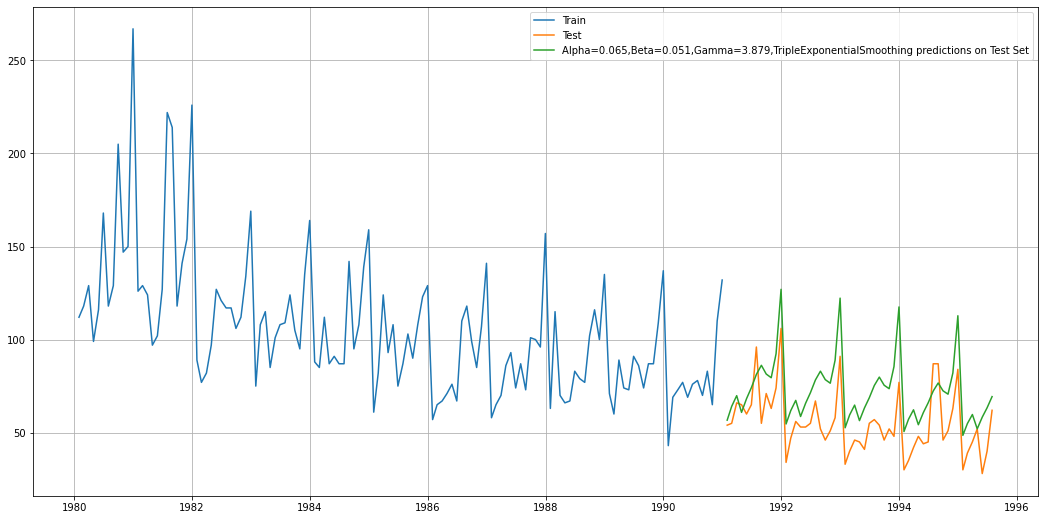

In [144]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [145]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = metrics.mean_absolute_percentage_error(TES_test['Rose'],TES_test['auto_predict'])*100
print("For Alpha=0.065,Beta=0.051,Gamma=3.879, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f Mape is %3.3f" %(rmse_model6_test_1,mape_model6_test_1))

For Alpha=0.065,Beta=0.051,Gamma=3.879, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.419 Mape is 36.949


In [146]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE   Test MAPE
RegressionOnTime                                     50.566395  101.525021
NaiveModel                                           78.464236  159.813924
SimpleAverageModel                                   52.357042  106.587261
Alpha=0.098,SimpleExponentialSmoothing               35.930728   72.588409
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.667269  497.743907
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...   20.419386   36.948504

In [147]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [148]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = metrics.mean_absolute_percentage_error(TES_train['Rose'],TES_train['predict',i,j,k])*100
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = metrics.mean_absolute_percentage_error(TES_test['Rose'],TES_test['predict',i,j,k])*100
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [149]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE   Train MAPE  \
0             0.3          0.3           0.3     23.015713    16.746964   
1             0.3          0.3           0.4     24.209084    17.417294   
2             0.3          0.3           0.5     25.730329    18.272215   
3             0.3          0.3           0.6     27.549930    19.369286   
4             0.3          0.3           0.7     28.793410    21.016097   
..            ...          ...           ...           ...          ...   
507           1.0          1.0           0.6  28358.458519  4594.940037   
508           1.0          1.0           0.7  30724.126331  4823.366285   
509           1.0          1.0           0.8   1218.755446   586.292576   
510           1.0          1.0           0.9  14150.253251  3167.375428   
511           1.0          1.0           1.0   1768.254189   708.433076   

        Test RMSE    Test MAPE  
0       20.838735    36.713274  
1       13.424572    15.410668  
2       34.435471    50.626575  
3       75.499262   122.001372  
4      119.689345   195.457803  
..            ...          ...  
507   9603.419143  8233.989500  
508  23029.952273  8362.531597  
509   9627.118188  9287.695307  
510   9691.952868  9465.898245  
511   8138.869072  8219.775660  

[512 rows x 7 columns]

In [150]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
1            0.3          0.3           0.4   24.209084   17.417294   
17           0.3          0.5           0.4   25.873405   17.959273   
26           0.3          0.6           0.5   28.141788   18.938583   
84           0.4          0.5           0.7   31.193940   21.944045   
67           0.4          0.3           0.6   28.034083   19.728951   

    Test RMSE  Test MAPE  
1   13.424572  15.410668  
17  13.594462  14.730627  
26  14.195649  15.235162  
84  15.826297  18.827010  
67  19.210722  28.170757

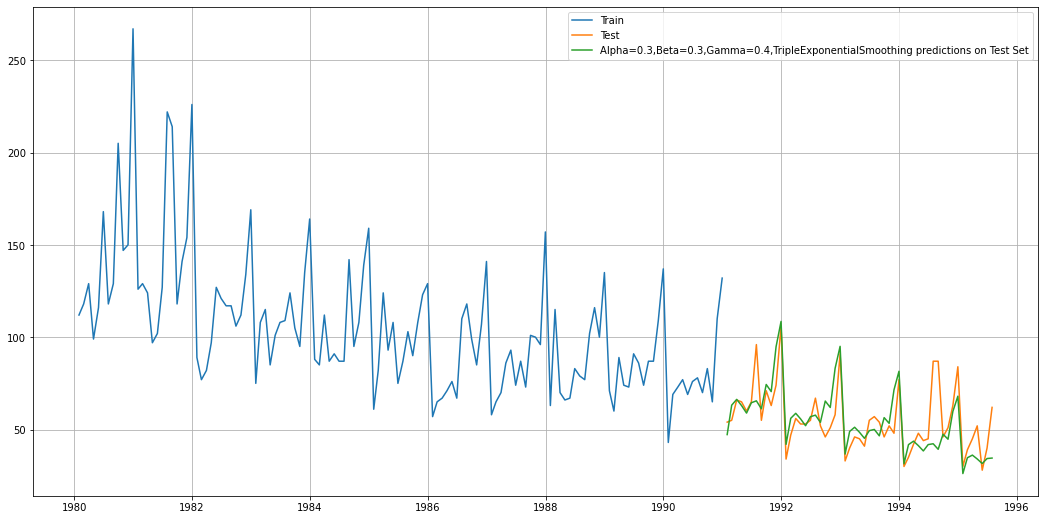

In [151]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [152]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][480]],'Test MAPE':[resultsDf_8_2['Test MAPE'][480]]}
                           ,index=['Alpha=0.1,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
df_result = resultsDf
df_result

Test RMSE    Test MAPE
RegressionOnTime                                      50.566395   101.525021
NaiveModel                                            78.464236   159.813924
SimpleAverageModel                                    52.357042   106.587261
Alpha=0.098,SimpleExponentialSmoothing                35.930728    72.588409
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        263.667269   497.743907
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...    20.419386    36.948504
Alpha=0.1,Beta=0.7,Gamma=0.3,TripleExponentialS...  3968.492992  4776.756502

In [153]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE    Test MAPE
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...    20.419386    36.948504
Alpha=0.098,SimpleExponentialSmoothing                35.930728    72.588409
RegressionOnTime                                      50.566395   101.525021
SimpleAverageModel                                    52.357042   106.587261
NaiveModel                                            78.464236   159.813924
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        263.667269   497.743907
Alpha=0.1,Beta=0.7,Gamma=0.3,TripleExponentialS...  3968.492992  4776.756502

## Sparkling

In [154]:
TES_train1 = train1.copy()
TES_test1 = test1.copy()

In [155]:
model_TES1 = ExponentialSmoothing(TES_train1['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [156]:
model_TES_autofit1 = model_TES1.fit()

In [157]:
model_TES_autofit1.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [158]:
TES_test1['auto_predict'] = model_TES_autofit1.forecast(steps=len(test))
TES_test1.head()

YearMonth  Sparkling  auto_predict
Time_Stamp                                   
1991-01-31   1991-01       1902   1577.224489
1991-02-28   1991-02       2049   1333.677558
1991-03-31   1991-03       1874   1745.945679
1991-04-30   1991-04       1279   1630.411925
1991-05-31   1991-05       1432   1523.289070

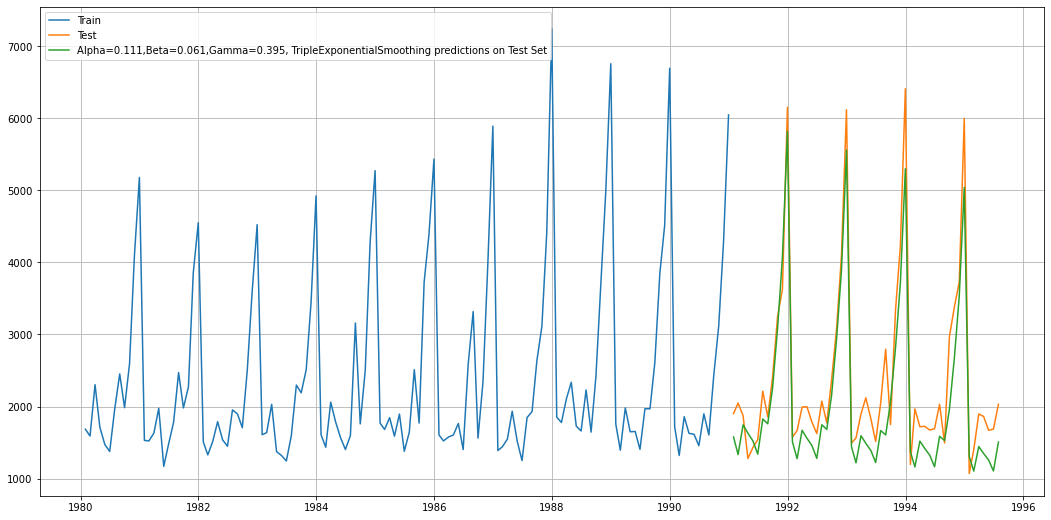

In [159]:
plt.figure(figsize=(18,9))
plt.plot(TES_train1['Sparkling'], label='Train')
plt.plot(TES_test1['Sparkling'], label='Test')

plt.plot(TES_test1['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395, TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [160]:
rmse_model6_test1_1 = metrics.mean_squared_error(TES_test1['Sparkling'],TES_test1['auto_predict'],squared=False)
mape_model6_test1_1 = metrics.mean_absolute_percentage_error(TES_test1['Sparkling'],TES_test1['auto_predict'])*100
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f Mape is %3.3f" %(rmse_model6_test1_1,mape_model6_test1_1))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.768 Mape is 17.580


In [161]:
resultsDf1_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test1_1],'Test MAPE':[mape_model6_test1_1]}
                           ,index=['Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_8_1])
resultsDf1

Test RMSE   Test MAPE
RegressionOnTime                                    1275.867052   39.888890
NaiveModel                                          3864.279352  201.327650
SimpleAverageModel                                  1275.081804   39.157336
Alpha=0.096,SimpleExponentialSmoothing              1316.035487   50.940345
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing       2463.486554   85.413964
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...    20.419386   36.948504

In [162]:
resultsDf1_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf1_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [163]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES1.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train1['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test1['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train1 = metrics.mean_squared_error(TES_train1['Sparkling'],TES_train1['predict',i,j,k],squared=False)
            mape_model8_train1 = metrics.mean_absolute_percentage_error(TES_train1['Sparkling'],TES_train1['predict',i,j,k])*100
        
            rmse_model8_test1 = metrics.mean_squared_error(TES_test1['Sparkling'],TES_test1['predict',i,j,k],squared=False)
            mape_model8_test1 = metrics.mean_absolute_percentage_error(TES_test1['Sparkling'],TES_test1['predict',i,j,k])*100
        
            resultsDf1_8_2 = resultsDf1_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train1
                                      ,'Train MAPE': mape_model8_train1,'Test RMSE':rmse_model8_test1
                                      ,'Test MAPE':mape_model8_test1}, ignore_index=True)

In [164]:
resultsDf1_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE   Train MAPE  \
0             0.3          0.3           0.3     392.133594    12.451001   
1             0.3          0.3           0.4     397.477558    12.150064   
2             0.3          0.3           0.5     407.436748    11.928082   
3             0.3          0.3           0.6     425.886756    12.217364   
4             0.3          0.3           0.7     450.986554    12.746743   
..            ...          ...           ...            ...          ...   
507           1.0          1.0           0.6  153394.791826  1962.955894   
508           1.0          1.0           0.7   94040.964958  1222.424178   
509           1.0          1.0           0.8  102196.953755   998.911540   
510           1.0          1.0           0.9   77924.294413   996.797788   
511           1.0          1.0           1.0  239917.432847  1581.679496   

        Test RMSE     Test MAPE  
0    3.439889e+02     12.756494  
1    8.266664e+02     29.258152  
2    1.453884e+03     50.352820  
3    2.117349e+03     71.609486  
4    2.457674e+03     82.076771  
..            ...           ...  
507  7.989790e+05  17461.714042  
508  1.074413e+06  30488.671861  
509  5.010607e+06  89432.250214  
510  4.318265e+05   4674.475378  
511  1.254280e+05   2933.504455  

[512 rows x 7 columns]

In [165]:
resultsDf1_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
0             0.3          0.3           0.3  392.133594   12.451001   
66            0.4          0.3           0.5  438.066407   12.622285   
131           0.5          0.3           0.6  521.738850   14.216832   
296           0.7          0.8           0.3  700.317756   17.246770   
9             0.3          0.4           0.4  414.969899   12.582475   

      Test RMSE  Test MAPE  
0    343.988883  12.756494  
66   412.648446  16.061812  
131  440.511829  16.338178  
296  518.188752  24.066658  
9    557.429427  20.770496

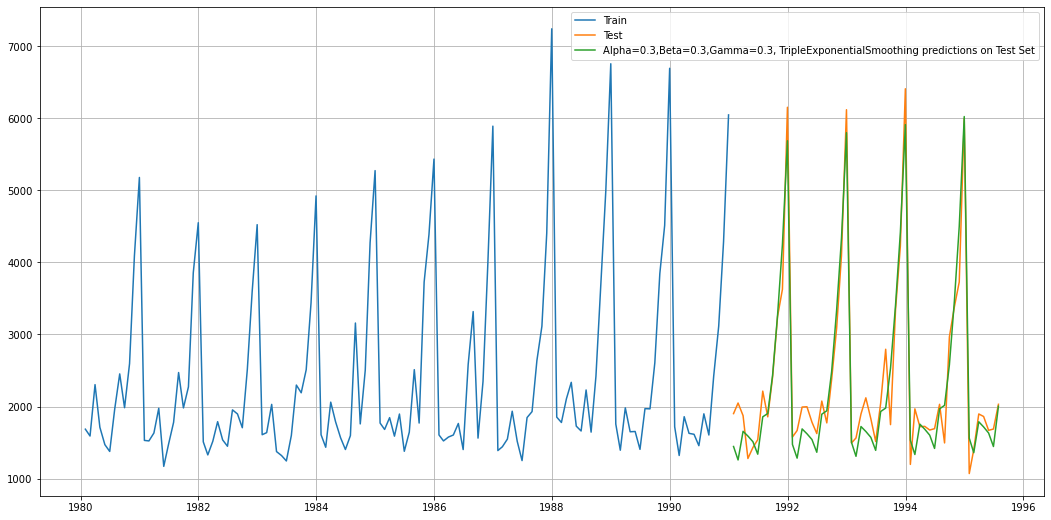

In [166]:
plt.figure(figsize=(18,9))
plt.plot(TES_train1['Sparkling'], label='Train')
plt.plot(TES_test1['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test1['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3, TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [167]:
resultsDf1_8_3 = pd.DataFrame({'Test RMSE': [resultsDf1_8_2['Test RMSE'][480]],'Test MAPE':[resultsDf1_8_2['Test MAPE'][480]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf1 = pd.concat([resultsDf1, resultsDf1_8_3])
df1_result=resultsDf1
df1_result

Test RMSE   Test MAPE
RegressionOnTime                                    1275.867052   39.888890
NaiveModel                                          3864.279352  201.327650
SimpleAverageModel                                  1275.081804   39.157336
Alpha=0.096,SimpleExponentialSmoothing              1316.035487   50.940345
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing       2463.486554   85.413964
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...    20.419386   36.948504
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...  9262.603615  307.077378

In [168]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf1.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE   Test MAPE
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...    20.419386   36.948504
SimpleAverageModel                                  1275.081804   39.157336
RegressionOnTime                                    1275.867052   39.888890
Alpha=0.096,SimpleExponentialSmoothing              1316.035487   50.940345
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing       2463.486554   85.413964
NaiveModel                                          3864.279352  201.327650
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...  9262.603615  307.077378

# Building an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

# Rose Sales

In [169]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [170]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

In [171]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448
ARIMA(0, 1, 2) - AIC:1276.8353734911866
ARIMA(1, 1, 0) - AIC:1319.3483105802602
ARIMA(1, 1, 1) - AIC:1277.775753553521
ARIMA(1, 1, 2) - AIC:1277.3592281129256
ARIMA(2, 1, 0) - AIC:1300.6092611744193
ARIMA(2, 1, 1) - AIC:1279.0456894093354
ARIMA(2, 1, 2) - AIC:1279.2986939365205


In [172]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359228
4  (1, 1, 1)  1277.775754
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [173]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -634.523
Method:                       css-mle   S.D. of innovations             30.176
Date:                Sat, 09 Oct 2021   AIC                           1279.046
Time:                        18:48:07   BIC                           1293.422
Sample:                    02-29-1980   HQIC                          1284.887
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4915      0.080     -6.148      0.000      -0.648      -0.335
ar.L1.D.Rose     0.2127      0.088      2.409      0.016       0.040       0.386
ar.L2.D.Rose    -0.0759      0.089     -0.85

# Predict on the Test Set using this model and evaluate the model.

In [174]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [175]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

16.86514083629643


In [176]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

RMSE
ARIMA(2,1,1)  16.865141

# Sparkling Sales

In [177]:
ARIMA_AIC1 = pd.DataFrame(columns=['param', 'AIC'])

In [178]:
for param in pdq:
    ARIMA_model = ARIMA(train1['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC1 = ARIMA_AIC1.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577
ARIMA(0, 1, 2) - AIC:2232.78309768405
ARIMA(1, 1, 0) - AIC:2268.5280607650034
ARIMA(1, 1, 1) - AIC:2235.0139453493175
ARIMA(1, 1, 2) - AIC:2233.597647121205
ARIMA(2, 1, 0) - AIC:2262.035600155025
ARIMA(2, 1, 1) - AIC:2232.3604899121387
ARIMA(2, 1, 2) - AIC:2210.6260491378257


In [179]:
ARIMA_AIC1.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.626049
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906439
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [180]:
auto_ARIMA1 = ARIMA(train1['Sparkling'], order=(2,1,1),freq='M')

results_auto_ARIMA1 = auto_ARIMA1.fit()

print(results_auto_ARIMA1.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1111.180
Method:                       css-mle   S.D. of innovations           1148.861
Date:                Sat, 09 Oct 2021   AIC                           2232.360
Time:                        18:48:11   BIC                           2246.736
Sample:                    02-29-1980   HQIC                          2238.202
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2034      3.807      1.629      0.103      -1.259      13.665
ar.L1.D.Sparkling     0.5026      0.087      5.753      0.000       0.331       0.674
ar.L2.D.Sparkling    -0.

# Predict on the Test Set using this model and evaluate the model.

In [181]:
predicted_auto_ARIMA1 = results_auto_ARIMA1.forecast(steps=len(test))

In [182]:
from sklearn.metrics import  mean_squared_error
rmse1 = mean_squared_error(test1['Sparkling'],predicted_auto_ARIMA1[0],squared=False)
print(rmse1)

1418.2183408763963


In [183]:
resultsDf1 = pd.DataFrame({'RMSE': [rmse1]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf1

RMSE
ARIMA(2,1,1)  1418.218341

# Building a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots

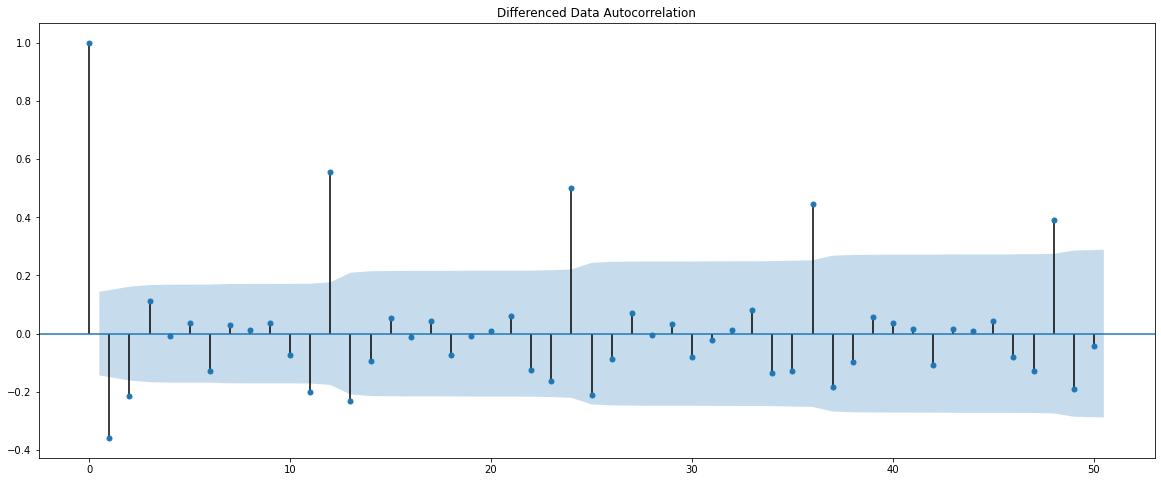

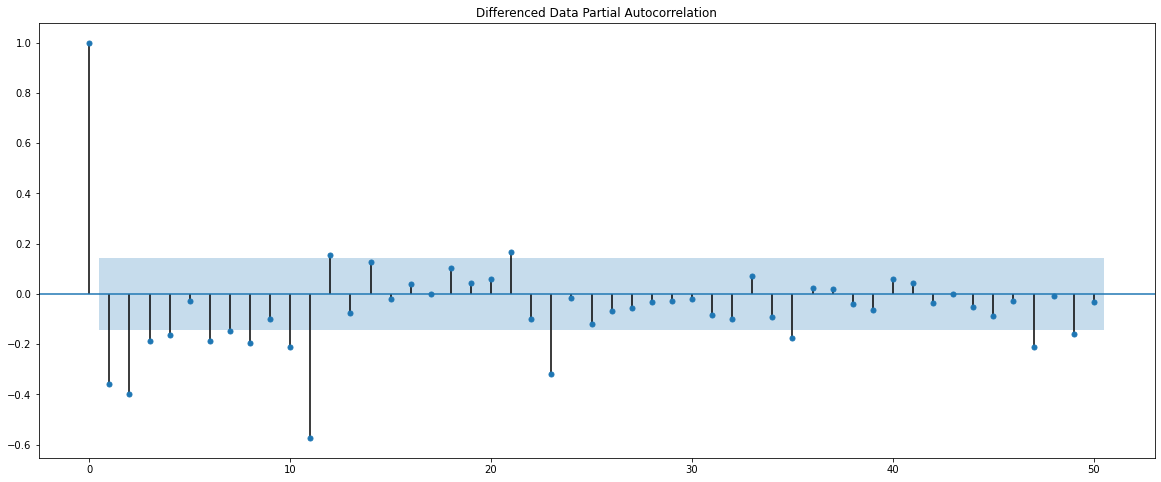

In [184]:
plot_acf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

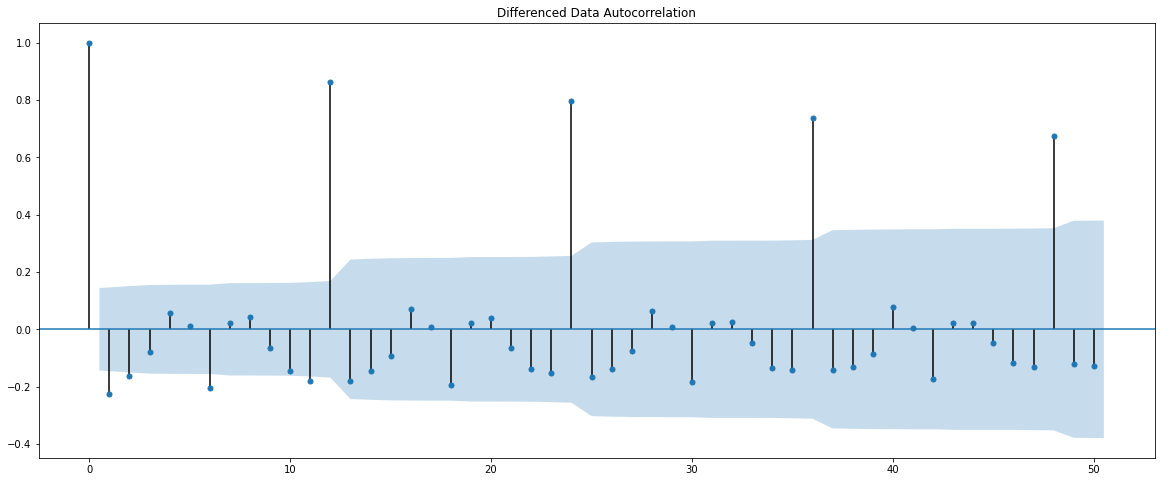

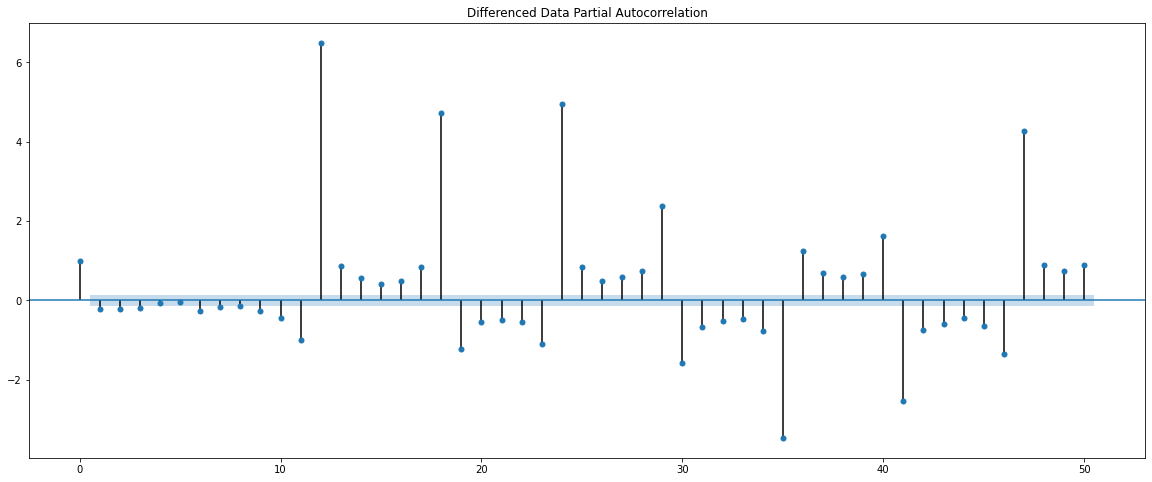

In [185]:
plot_acf(df2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [186]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.576
Method:                           css   S.D. of innovations             38.931
Date:                Sat, 09 Oct 2021   AIC                           1335.153
Time:                        18:48:12   BIC                           1340.903
Sample:                    02-29-1980   HQIC                          1337.489
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1527      3.401      0.045      0.964      -6.514       6.819


In [187]:
manual_ARIMA1 = ARIMA(train1['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA1 = manual_ARIMA1.fit()

print(results_manual_ARIMA1.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Sat, 09 Oct 2021   AIC                           2269.583
Time:                        18:48:12   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


# Predict on the Test Set using this model and evaluate the model

In [188]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [189]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

82.82435427902982


In [190]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,1)  16.865141
ARIMA(0,1,0)  82.824354

In [191]:
predicted_manual_ARIMA1 = results_manual_ARIMA1.forecast(steps=len(test))

In [192]:
rmse1 = mean_squared_error(test1['Sparkling'],predicted_manual_ARIMA1[0],squared=False)
print(rmse1)

4779.15429919654


In [193]:
temp_resultsDf1 = pd.DataFrame({'RMSE': [rmse1]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf1])

resultsDf1

RMSE
ARIMA(2,1,1)  1418.218341
ARIMA(0,1,0)  4779.154299

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

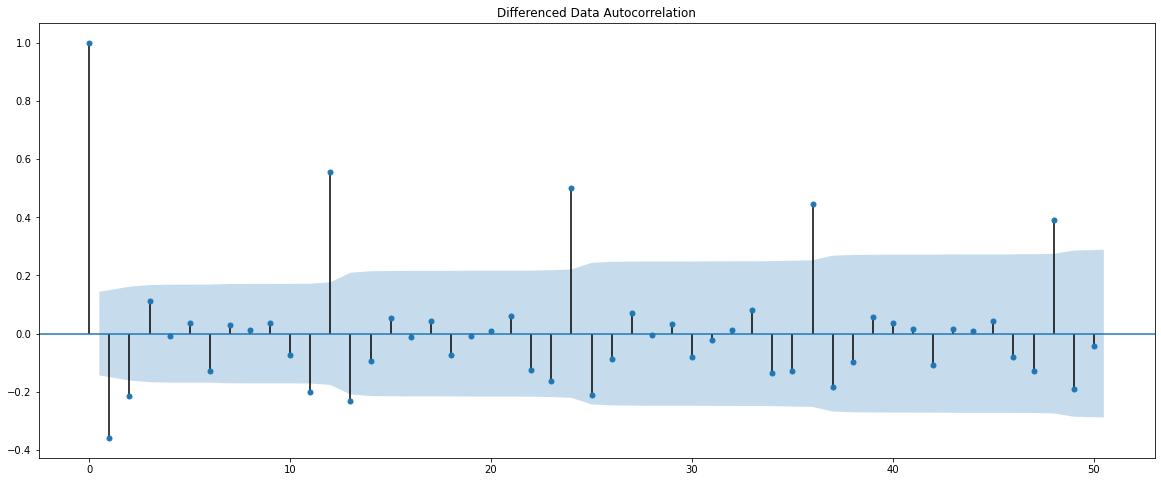

In [194]:
plot_acf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

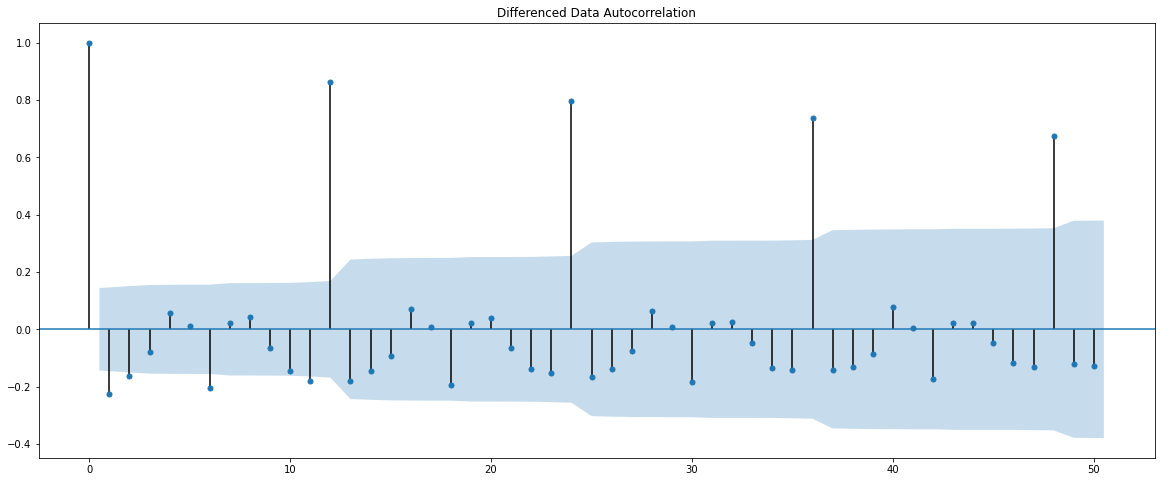

In [195]:
plot_acf(df2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## Setting the seasonality as 12 for the second iteration of the auto SARIMA model

In [196]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [197]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [198]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635750373
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945867
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383807
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094548
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483311407
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461666
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988257864924
SARIMA(0, 1, 2)x(0, 0, 

In [199]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.902650
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [200]:
SARIMA_AIC1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model1 = sm.tsa.statespace.SARIMAX(train1['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA1 = SARIMA_model1.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA1.aic))
        SARIMA_AIC1 = SARIMA_AIC1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA1.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235496
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791944
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920774
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956687
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957278316
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319373017
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.13196585489
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245088165164
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018833130494
SARIMA(0, 1, 2)

In [201]:
SARIMA_AIC1.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340404

### Rose Sales

In [202]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.951
Date:                            Sat, 09 Oct 2021   AIC                            889.903
Time:                                    18:50:21   BIC                            911.058
Sample:                                         0   HQIC                           898.473
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1546      0.325      0.476      0.634      -0.482       0.792
ma.L1       -101.6562   3557.249   

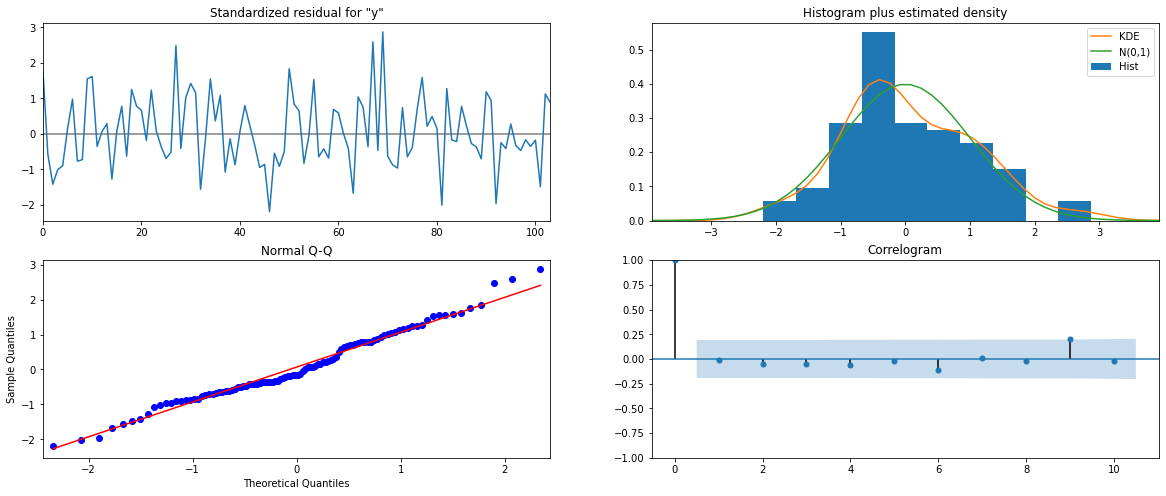

In [203]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [204]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [205]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  63.040770  15.913763      31.850367      94.231173
1  70.928588  16.100933      39.371339     102.485838
2  77.518510  16.108674      45.946088     109.090931
3  76.381162  16.109371      44.807375     107.954948
4  72.845629  16.109468      41.271650     104.419607

In [206]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.574631607951037


In [207]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

df3_result=resultsDf
df3_result

RMSE
ARIMA(2,1,1)             16.865141
ARIMA(0,1,0)             82.824354
SARIMA(1,1,2)(2,0,2,12)  26.574632

## Sparkling Sales

In [208]:
sauto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train1['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sauto_SARIMA_12 = sauto_SARIMA_12.fit(maxiter=1000)
print(results_sauto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -769.967
Date:                            Sat, 09 Oct 2021   AIC                           1555.935
Time:                                    18:50:26   BIC                           1577.090
Sample:                                         0   HQIC                          1564.505
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6380      0.287     -2.225      0.026      -1.200      -0.076
ma.L1         -0.3050      0.185   

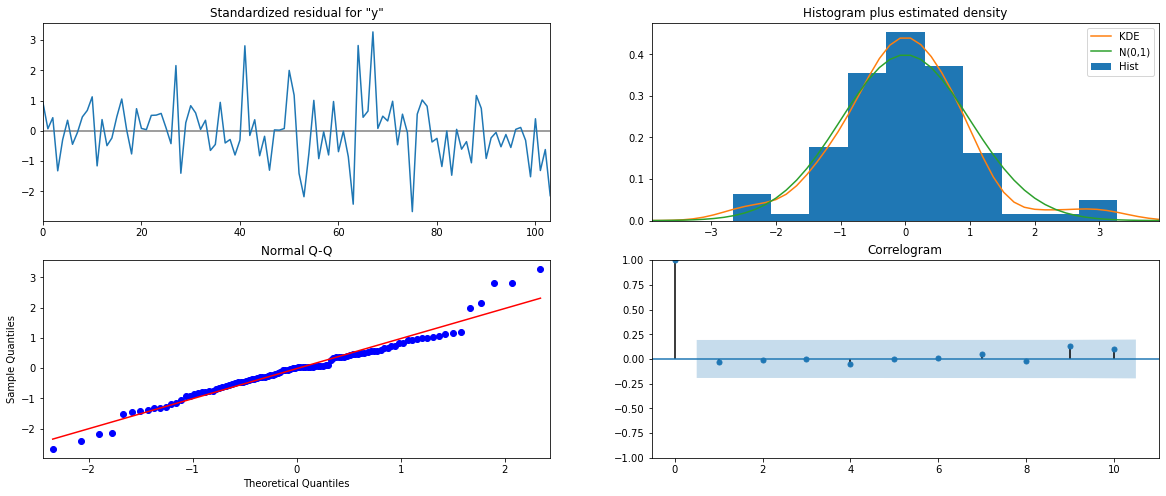

In [209]:
results_sauto_SARIMA_12.plot_diagnostics()
plt.show()

In [210]:
predicted_sauto_SARIMA_12 = results_sauto_SARIMA_12.get_forecast(steps=len(test))

In [211]:
predicted_sauto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1317.823866  390.275073     552.898778    2082.748954
1  1309.760427  403.641498     518.637628    2100.883225
2  1608.855215  403.653623     817.708652    2400.001777
3  1599.901687  409.154625     797.973358    2401.830017
4  1378.288641  410.005783     574.692074    2181.885209

In [212]:
rmses = mean_squared_error(test1['Sparkling'],predicted_sauto_SARIMA_12.predicted_mean,squared=False)
print(rmses)

546.5064933181865


In [213]:
temp_resultsDf1 = pd.DataFrame({'RMSE': [rmses]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf1])

df4_result=resultsDf1
df4_result

RMSE
ARIMA(2,1,1)             1418.218341
ARIMA(0,1,0)             4779.154299
SARIMA(1,1,2)(2,0,2,12)   546.506493

## Building the most optimum model on the Full Data

In [214]:
full_data_model = sm.tsa.statespace.SARIMAX(df1['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -652.206
Date:                            Sat, 09 Oct 2021   AIC                           1318.412
Time:                                    18:50:28   BIC                           1339.894
Sample:                                01-31-1980   HQIC                          1327.135
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7446      0.081     -9.166      0.000      -0.904      -0.585
ma.L2         -0.1634      0.076   

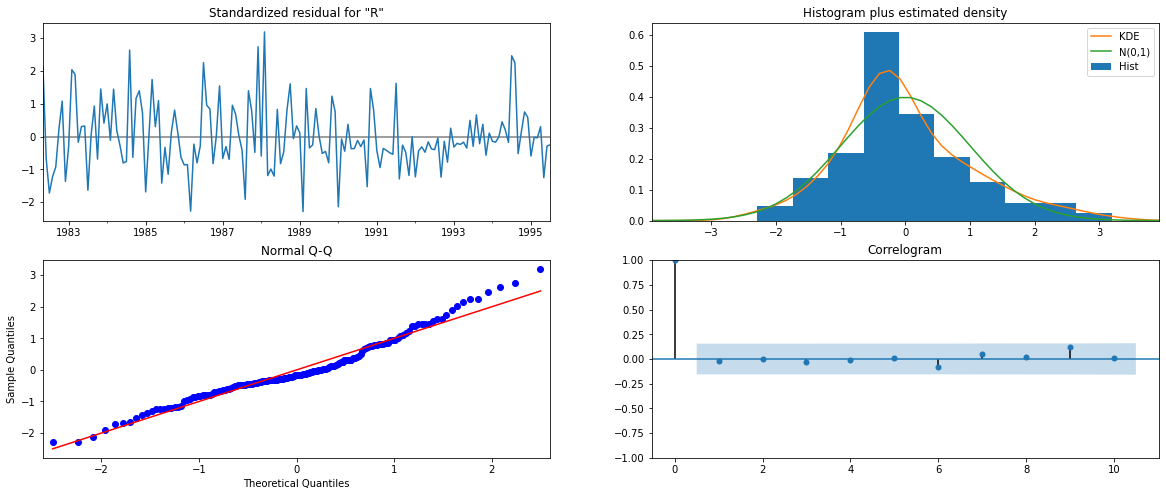

In [215]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year)

## Rose

In [216]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [217]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  63.006925  14.554450      34.480728      91.533122
1995-09-30  44.963750  15.021491      15.522169      74.405330
1995-10-31  48.162866  15.081016      18.604618      77.721115
1995-11-30  53.482623  15.140308      23.808165      83.157081
1995-12-31  70.545220  15.199368      40.755006     100.335435

In [218]:
rmse = mean_squared_error(df1['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 27.86317719450466


In [219]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

In [220]:
pred_full_manual_SARIMA_date['mean']

1995-08-31    63.006925
1995-09-30    44.963750
1995-10-31    48.162866
1995-11-30    53.482623
1995-12-31    70.545220
1996-01-31    33.282148
1996-02-29    38.799490
1996-03-31    43.261555
1996-04-30    47.211385
1996-05-31    36.032806
1996-06-30    42.158236
1996-07-31    59.875787
Freq: M, Name: mean, dtype: float64

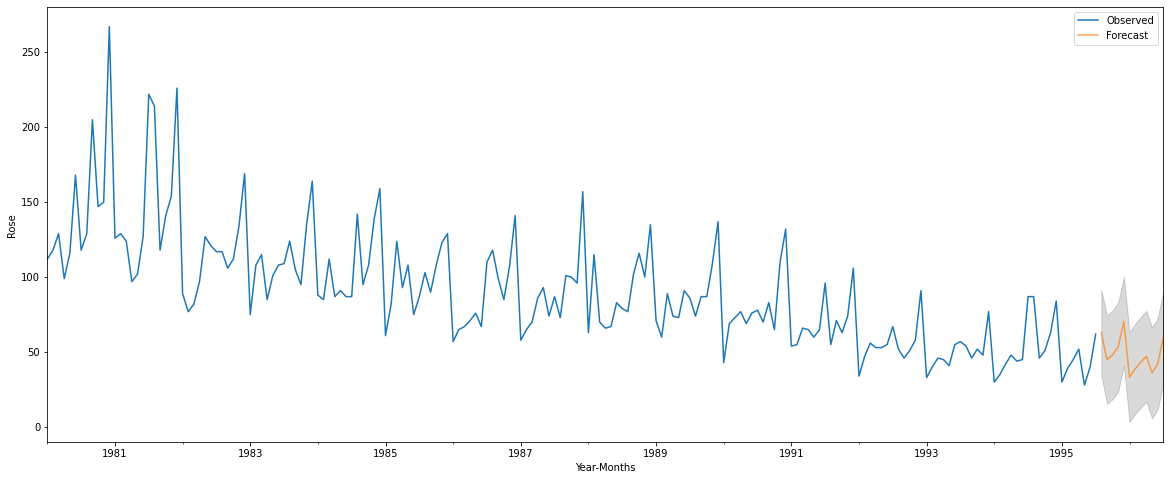

In [221]:
axis = df1['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [222]:
resultsDf

RMSE
ARIMA(2,1,1)             16.865141
ARIMA(0,1,0)             82.824354
SARIMA(1,1,2)(2,0,2,12)  26.574632

## Sparkling

In [223]:
full_data_model1 = sm.tsa.statespace.SARIMAX(df2['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model1 = full_data_model1.fit(maxiter=1000)
print(results_full_data_model1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1258.196
Date:                           Sat, 09 Oct 2021   AIC                           2530.391
Time:                                   18:50:30   BIC                           2552.383
Sample:                               01-31-1980   HQIC                          2539.315
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9478      0.106     -8.973      0.000      -1.155      -0.741
ma.L2         -0.1247      0.087     -1.442

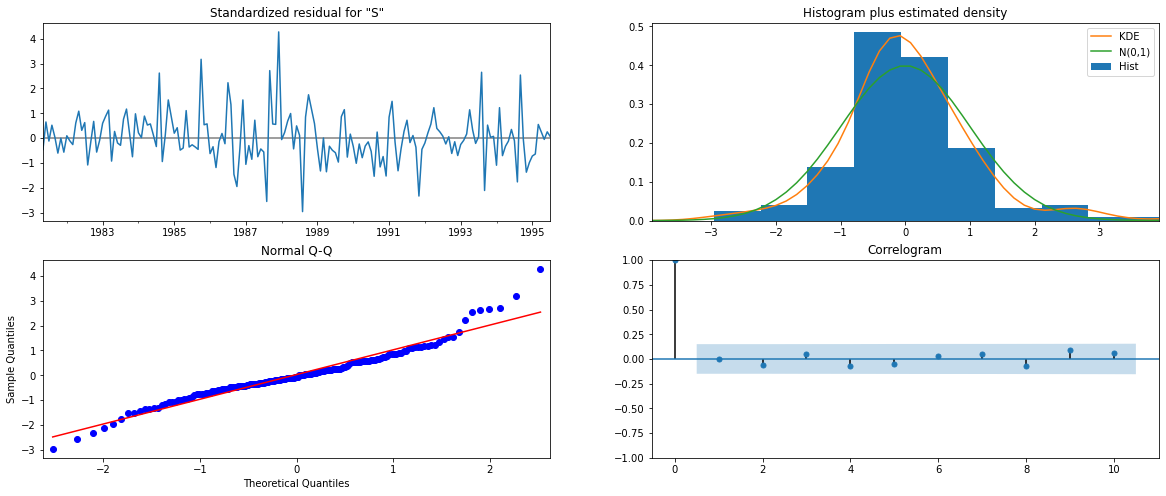

In [224]:
results_full_data_model1.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future (till the end of next year)

In [225]:
predicted_manual_SARIMA_12_full_data1 = results_full_data_model1.get_forecast(steps=12)

In [226]:
predicted_manual_SARIMA_12_full_data1.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1864.165435  372.560653    1133.959973    2594.370897
1995-09-30  2393.351684  378.424156    1651.653967    3135.049401
1995-10-31  3285.344267  379.273907    2541.981070    4028.707464
1995-11-30  4017.551038  380.121763    3272.526072    4762.576003
1995-12-31  6286.173252  380.967739    5539.490206    7032.856299

In [227]:
rmse = mean_squared_error(df2['Sparkling'],results_full_data_model1.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 531.9772128749045


In [228]:
pred_full_manual_SARIMA_date1 = predicted_manual_SARIMA_12_full_data1.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

In [229]:
pred_full_manual_SARIMA_date1['mean']

1995-08-31    1864.165435
1995-09-30    2393.351684
1995-10-31    3285.344267
1995-11-30    4017.551038
1995-12-31    6286.173252
1996-01-31    1221.280933
1996-02-29    1544.787187
1996-03-31    1777.928683
1996-04-30    1781.231234
1996-05-31    1665.513263
1996-06-30    1636.557580
1996-07-31    1981.613486
Freq: M, Name: mean, dtype: float64

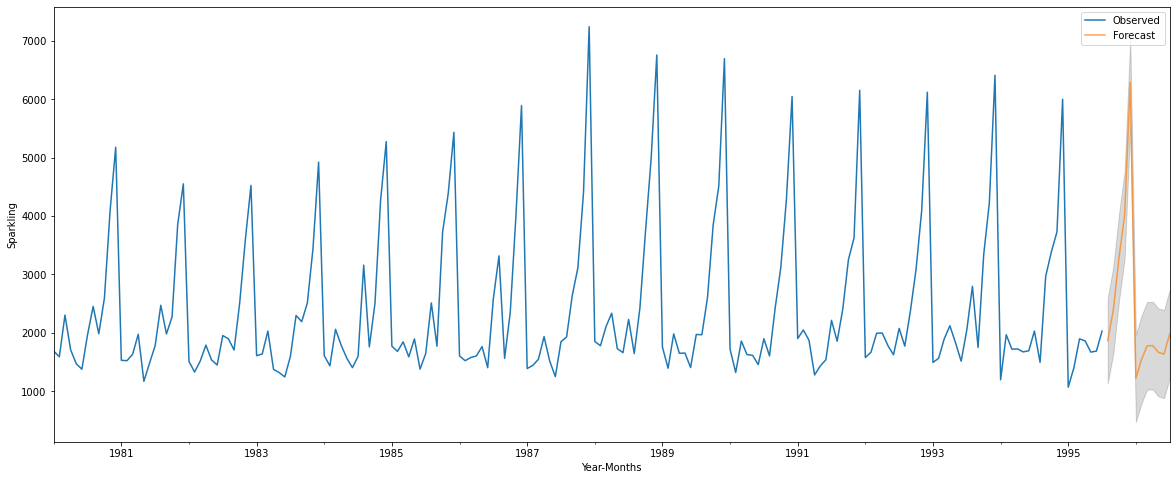

In [230]:
axis = df2['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date1['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date1.index, pred_full_manual_SARIMA_date1['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date1['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [231]:
resultsDf1

RMSE
ARIMA(2,1,1)             1418.218341
ARIMA(0,1,0)             4779.154299
SARIMA(1,1,2)(2,0,2,12)   546.506493

In [232]:
frames = [df_result, df1_result, df3_result, df4_result]

result = pd.concat(frames)

In [233]:
result

Test RMSE    Test MAPE  \
RegressionOnTime                                      50.566395   101.525021   
NaiveModel                                            78.464236   159.813924   
SimpleAverageModel                                    52.357042   106.587261   
Alpha=0.098,SimpleExponentialSmoothing                35.930728    72.588409   
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        263.667269   497.743907   
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...    20.419386    36.948504   
Alpha=0.1,Beta=0.7,Gamma=0.3,TripleExponentialS...  3968.492992  4776.756502   
RegressionOnTime                                    1275.867052    39.888890   
NaiveModel                                          3864.279352   201.327650   
SimpleAverageModel                                  1275.081804    39.157336   
Alpha=0.096,SimpleExponentialSmoothing              1316.035487    50.940345   
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing       2463.486554    85.413964   
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...    20.419386    36.948504   
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...  9262.603615   307.077378   
ARIMA(2,1,1)                                                NaN          NaN   
ARIMA(0,1,0)                                                NaN          NaN   
SARIMA(1,1,2)(2,0,2,12)                                     NaN          NaN   
ARIMA(2,1,1)                                                NaN          NaN   
ARIMA(0,1,0)                                                NaN          NaN   
SARIMA(1,1,2)(2,0,2,12)                                     NaN          NaN   

                                                           RMSE  
RegressionOnTime                                            NaN  
NaiveModel                                                  NaN  
SimpleAverageModel                                          NaN  
Alpha=0.098,SimpleExponentialSmoothing                      NaN  
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing               NaN  
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...          NaN  
Alpha=0.1,Beta=0.7,Gamma=0.3,TripleExponentialS...          NaN  
RegressionOnTime                                            NaN  
NaiveModel                                                  NaN  
SimpleAverageModel                                          NaN  
Alpha=0.096,SimpleExponentialSmoothing                      NaN  
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing               NaN  
Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExpone...          NaN  
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...          NaN  
ARIMA(2,1,1)                                          16.865141  
ARIMA(0,1,0)                                          82.824354  
SARIMA(1,1,2)(2,0,2,12)                               26.574632  
ARIMA(2,1,1)                                        1418.218341  
ARIMA(0,1,0)                                        4779.154299  
SARIMA(1,1,2)(2,0,2,12)                              546.506493